Hi Jolene. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1<a class="tocSkip">

Thank you! Your project has been received. You've done a lot of work. Regrettably, your project is not quite ready for review. This is because the period of time for analysis is wrong. You've already done a lot, I am sure you can handle it!

<font color='red'><b><u> Student Comment on Version 1 </u></b></font>

Hi Svetlana, Thank you for your feedback. I want to be a good coder so I appreciate your input!

I have made the changes you requested and updated my conclusions. I hope this is what you were looking for.

Thank you,

Jolene G. 

## Review v. 2<a class="tocSkip">

All your hard work has paid off, and now your project is perfect! Your project has passed code review. Congratulations! Keep at it. You're improving every day!

# Integrated Project 1

***Project Description***
- Ice is an online store that sells video games all over the world

***Tasks***
- Identify patterns that determine whether a game succeeds or not. 
    - This will allow you to spot potential big winners and plan advertising campaigns.
- Plan a campaign for 2017
    - (The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)
    
***Important notes***
- User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. 
- Data includes information to the end of 2016
- The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.
- Data description
    - Name
    - Platform
    - Year_of_Release
    - Genre
    - NA_sales (North American sales in USD million)
    - EU_sales (sales in Europe in USD million)
    - JP_sales (sales in Japan in USD million)
    - Other_sales (sales in other countries in USD million)
    - Critic_Score (maximum of 100)
    - User_Score (maximum of 10)
    - Rating (ESRB)
    - Data for 2016 may be incomplete.

# Plan of action
1. Import Libraries
2. Open the data files and study the general information
3. Data Preprocessing
    - Create working version of the dataframe
    - 3.a. Clean up the data
        - Replace the column names (make them lowercase).
        - Convert the data to the required types.
        - Describe the columns where the data types have been changed and why.
        - If necessary, decide how to deal with missing values:
            - Explain why you filled in the missing values as you did or why you decided to leave them blank.
            - Why do you think the values are missing? Give possible reasons.
            - Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
    - 3.b. Calculate requested information
        - Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
4. Analyze the data
    - Look at how many games were released in different years. Is the data for every period significant?
    - Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
    - Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
    - Work only with the data that you've decided is relevant. Disregard the data for previous years.
    - Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
    - Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
    - Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
    - Keeping your conclusions in mind, compare the sales of the same games on other platforms.
    - Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?
5. Create a user profile for each region
    - For each region (NA, EU, JP), determine:
        - The top five platforms. Describe variations in their market shares from region to region.
        - The top five genres. Explain the difference.
        - Do ESRB ratings affect sales in individual regions?
6. Answer hypothesis questions
    - Average user ratings of the Xbox One and PC platforms are the same.
    - Average user ratings for the Action and Sports genres are different.
7. Write general conclusion


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job that you clearly described the project.
</div>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math as mt
from scipy import stats as st
from functools import reduce

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's a good idea to use additional options for warnings.
</div>

##  Open the data files and study the general information

***Read data as dataframes and examine the original data***

In [2]:
# read data as a dataframe
games_orig = pd.read_csv('/datasets/games.csv')

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Great, data is downloaded.
</div>

In [3]:
print('game dataframe')
games_orig.head()

game dataframe


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
print('game dataframe information')
games_orig.info()

game dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
print('counts of each game')
games_orig['Name'].value_counts(dropna=False)

counts of each game


Need for Speed: Most Wanted              12
Ratatouille                               9
FIFA 14                                   9
Madden NFL 07                             9
LEGO Marvel Super Heroes                  9
                                         ..
Pulse Racer                               1
Mobile Suit Gundam: Journey to Jaburo     1
Hang On GP                                1
Bomberman Max 2: Blue Advance             1
Billy's Boot Camp: Wii de Enjoy Diet!     1
Name: Name, Length: 11560, dtype: int64

In [6]:
print('count of platform types')
print(games_orig['Platform'].value_counts(dropna=False))

count of platform types
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64


In [7]:
print('count of year of release')
games_orig['Year_of_Release'].value_counts(dropna=False)

count of year of release


2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [8]:
print('count of genres')
games_orig['Genre'].value_counts(dropna=False)

count of genres


Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
NaN                2
Name: Genre, dtype: int64

In [9]:
print('counts of NA sales')
games_orig['NA_sales'].value_counts(dropna=False)

counts of NA sales


0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.98       1
4.21       1
6.82       1
5.05       1
9.00       1
Name: NA_sales, Length: 402, dtype: int64

In [10]:
print('counts of EU sales')
games_orig['EU_sales'].value_counts(dropna=False)

counts of EU sales


0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
3.59       1
4.02       1
2.24       1
2.27       1
3.75       1
Name: EU_sales, Length: 307, dtype: int64

In [11]:
print('counts of JP sales')
games_orig['JP_sales'].value_counts(dropna=False)

counts of JP sales


0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
1.16        1
2.12        1
7.20        1
2.17        1
6.50        1
Name: JP_sales, Length: 244, dtype: int64

In [12]:
print('counts of other sales')
games_orig['Other_sales'].value_counts(dropna=False)

counts of other sales


0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.96       1
1.93       1
0.97       1
1.37       1
1.06       1
Name: Other_sales, Length: 155, dtype: int64

In [13]:
print('count of critic scores')
games_orig['Critic_Score'].value_counts(dropna=False)

count of critic scores


NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
20.0       3
13.0       1
17.0       1
22.0       1
21.0       1
Name: Critic_Score, Length: 83, dtype: int64

In [14]:
print('count of user scores')
games_orig['User_Score'].value_counts(dropna=False)

count of user scores


NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.5       2
1.5       2
1         2
0         1
9.7       1
Name: User_Score, Length: 97, dtype: int64

In [15]:
print('count of ratings')
games_orig['Rating'].value_counts(dropna=False)

count of ratings


NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [16]:
print('number of duplicate rows:')
games_orig.duplicated().sum()

number of duplicate rows:


0

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, we don't have duplicates.
</div>

In [17]:
# determine number of missing values in each column
print('number of missing values for each column')
games_orig.isnull().sum()

number of missing values for each column


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [18]:
# determine impact of missing values in year_of_release column
print('% of missing values in each column')
perc_missing_values = (games_orig.isnull().sum() / len(games_orig) * 100)
print(perc_missing_values)

% of missing values in each column
Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
The percentage of a missing values in the entire data is important to know before making a decision about data preparation.
</div>

# 2 Conclusion of original data

***Actions Performed***
- Original file was read as a dataframe
    - The following was reviewed
        - The first 5 rows
        - The general information
        - Counts of the column values where appropriate

***General Information***
- There are 16715 entries
- The following columns are missing values:
    - Name
    - Platform
    - Year_of_Release
    - Genre
    - Critic_Score
    - User_Score
    - Rating
- Critic_Score, User_Score, and Rating have over 40% of their values missing, the others are under 2%
- The User_Score column contains 'tbd' values
- Each region has games that earned 0 dollars

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok :)
</div>

## a. Data Preprocessing

***Action Plan***
- Create working version of the data
- Clean up the data
    - Replace the column names (make them lowercase).
    - Convert the data to the required types.
        - Describe the columns where the data types have been changed and why.
    - If necessary, decide how to deal with missing values:
        - Explain why you filled in the missing values as you did or why you decided to leave them blank.
        - Why do you think the values are missing? Give possible reasons.
        - Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

***Create working version of the data***

In [19]:
games = pd.read_csv('/datasets/games.csv')
print('working dataframe:')
games.head()

working dataframe:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


***Replace the column names (make them lowercase)***

In [20]:
# make column names lowercase
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [21]:
# confirm column names changed to lower case
print('updated column names as lower case:')
games.columns

updated column names as lower case:


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you brought columns to the lower case. 
</div>

***Delete missing values that account for 10% or less of data***

In [22]:
# remove rows that are missing less than 10% of their values
games = games.dropna(subset = ['name', 'year_of_release', 'genre']).reset_index(drop=True)
print('games info after removing missing values under 10% of data')
games.info() 

games info after removing missing values under 10% of data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***Change 'tbd' in user_score to None values***

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, 'tbd' is expected to be NaN.
</div>

In [23]:
print('count of user scores')
games['user_score'].value_counts(dropna=False)

count of user scores


NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
0.5       2
1.5       2
1         2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [24]:
games['user_score'] = games['user_score'].replace('tbd', None)
print('count of user scores after tbd changed to None')
games['user_score'].value_counts(dropna=False)

count of user scores after tbd changed to None


NaN    7834
7.8     384
8.2     329
8       325
7.5     291
       ... 
1.5       2
9.6       2
1.3       2
1         2
0         1
Name: user_score, Length: 96, dtype: int64

***Convert the data to the required types***
- Change year_of_release from float to int because this is a more appropriate datatype
- Change user_score from object to float because this value is a number and is more appropriate as a float

In [25]:
# change datatypes where appropriate
games['year_of_release'] = games['year_of_release'].astype(int)
games['user_score'] = games['user_score'].astype(float)
print('games info after data type changes')
games.info()

games info after data type changes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         8610 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, it's necessary to change data types.
</div>

# 3.a. Conclusion

***Actions Performed***
- Created a working version of dataframe
- Cleaned up data
    - changed column names to lowercase
    - processed columns with missing values
        - The following columns have less than 10% of missing values and their rows were removed because their loss should not significantly impact the analysis
            - name
            - year_of_release
            - genre
        - These values are likely missing due to entry or data processing errors, and/or the location the data was pulled from doesnt have the information
        - The following columns had > 40% of missing values, these were left as is
            - critic_score
            - user_score
            - rating
        - These values could be missing due to entry or data processing errors, they are unknown, there is no information available, and/or the location the data was pulled from doesnt have the information
    - processed 'tbd' values in user_score column - changed to None type
    - converted year_of_release column from float to int because this is more appropriate for this type of information
    - converted critic_score column from object to float because this value is a number and is more appropriate as a float
    
            

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, a reasonable explanation of a possible reasons of a missing values.
</div>

#  3.b. Calculate requested information
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

***Action Plan***
- Create a new column containing the sum of all sales
- Find rows with zero total sales (sum from all regions)
    - remove them

***Create a total sales column***

In [26]:
# create a new column containng the sum of all sales
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
print('updated dataframe with new column')
games.head()

updated dataframe with new column


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


***Remove rows with total sales of 0***

In [27]:
# examine any rows with 0 total sales
print('rows with 0 total sales')
games.query('total_sales == 0')

rows with 0 total sales


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16405,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16438,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


In [28]:
# remove rows with 0 total sales
games.drop(games[games['total_sales'] == 0].index, inplace=True)
# confirm 0 sales were dropped
print('confirmation that rows with 0 sales have been removed')
games.query('total_sales == 0')

confirmation that rows with 0 sales have been removed


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [29]:
# examine the total sales column
print('total_sales stats')
games['total_sales'].describe()

total_sales stats


count    16442.000000
mean         0.536089
std          1.558869
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

# 3.b. Conclusion
***Actions performed***
- A new column was created containing the sum of sales per game
- Removed 2 rows containing zero total sales
- Examined the stats of the total_sales column

***Conclusions***
- the max profit was 82.54 million
- the mean is .53 million, which is higher than the median at .17 million, suggesting that there are large outliers

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
👍👍👍
</div>

## Analyze the Data
4 a. Look at how many games were released in different years. Is the data for every period significant?

4 b. Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

4 c. Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
    - Work only with the data that you've decided is relevant. Disregard the data for previous years.
    
4 d. Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

4 e. Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

4 f. Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

4 g. Keeping your conclusions in mind, compare the sales of the same games on other platforms.

4 h. Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

***4.a. Look at how many games were released in different years. Is the data for every period significant?***

In [30]:
# create a table showing the number of games released each year
games_per_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
print('number of games released per year')
games_per_year.head()

number of games released per year


,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


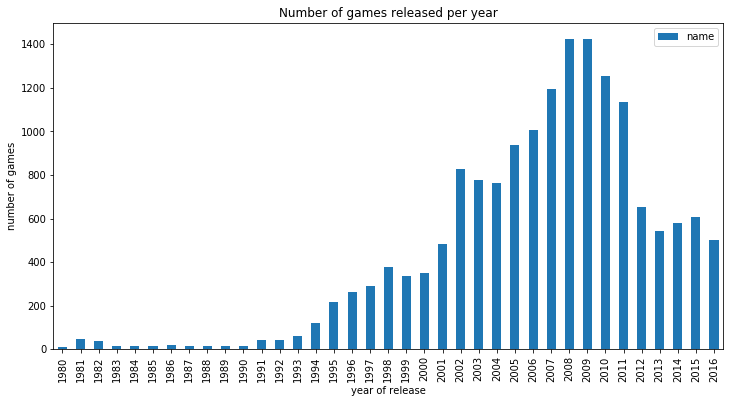

In [31]:
# graph the results
games_per_year.plot(kind='bar', figsize=(12, 6))
plt.title('Number of games released per year')
plt.xlabel('year of release')
plt.ylabel('number of games')
plt.show()

***4.a. Conclusion***
- The data before 2000 appears to be less significant than the data after 2000 when the number of released games start to increase.

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
An excellent graph. Could you please describe a possible reason of increase and decrease the number of games?
</div>

<font color='red'><b><u> Student update V.2.: </u></b></font>
    
4.a. Conclusion updates
- Possible reasons for the increase in the number of games could be due to the following:
    - it became easier to make games
    - there were more companies making games
- Possible reasons for the decrease in the number of games could be due to the following:
    - games take longer to make so fewer come out

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, it's interesting suggestions :)
    
The growth the number of games could be associated with an increase in the number of personal computers/platforms per user and Internet users, and the decline with the growing popularity of mobile games. As you mention influence of economic crisis also can have influence on this trend.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please note that it's better to use data since 2014. Could you please explain why? Please fix it and I will continue to check your project.
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 2:
    
It will be better to use data since 2014. The reason why to chose data since 2014 is the following. We see that the leader in sales for the entire history of the PS2. But sales by 2011 are already zero. The X360 was at its peak in 2010, but by 2016 it had fallen to almost 0. In general, a sharp decline in the platform can occur in just 3 years. Let's look at this sales horizon.
</div>

***4.b.1. Look at how sales varied from platform to platform.***

In [32]:
# create a table showing the sales per platform
sales_per_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
print('total sales per platform')
sales_per_platform.sort_values(by='total_sales').head()

total sales per platform


,total_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42


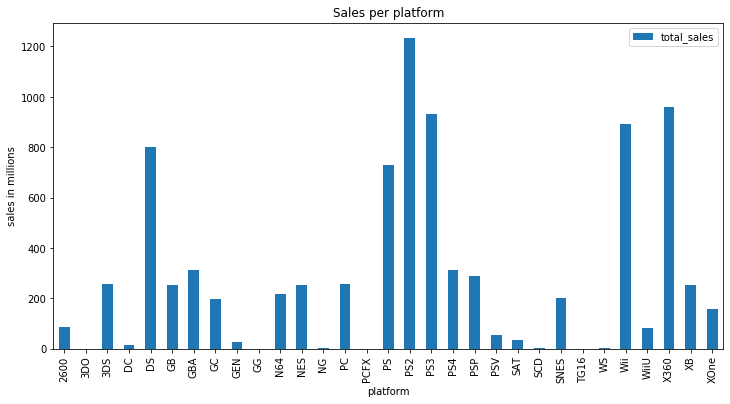

In [33]:
# graph the results
sales_per_platform.plot(kind='bar', figsize=(12, 6))
plt.title('Sales per platform')
plt.xlabel('platform')
plt.ylabel('sales in millions')
plt.show()

***4.b.2. Choose the platforms with the greatest total sales and build a distribution based on data for each year.***

***Top 6 platforms***

PS	727.58

DS	802.78

Wii	891.18

PS3	931.34

X360 961.24

PS2	1233.56

In [34]:
# create a list of top 6 platforms
top_six_list = ['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']
# generate a query of the top 6 platforms
top_six = games.query('platform in @top_six_list')
print('dataframe with top six platforms')
top_six.head()

dataframe with top six platforms


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [35]:
# obtain desired info
top_six_data = top_six.pivot_table(index='year_of_release', columns='platform', values='total_sales')
top_six_data.head()

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,0.354706,NaN,NaN,NaN,NaN
1995,NaN,0.363232,NaN,NaN,NaN,NaN
1996,NaN,0.577439,NaN,NaN,NaN,NaN
1997,NaN,0.724309,NaN,NaN,NaN,NaN


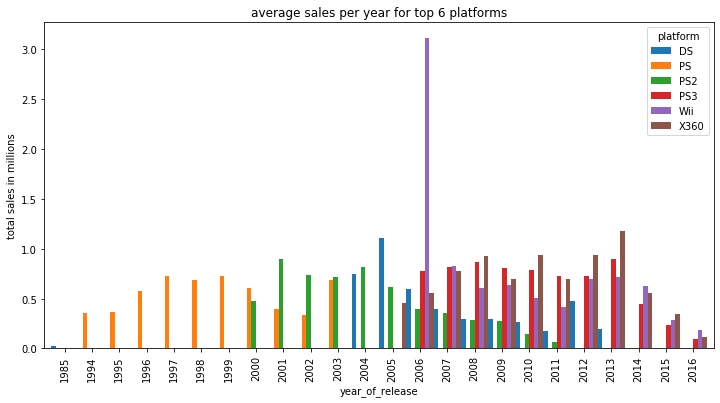

In [36]:
# graph the average sales per year for each platform
top_ax = top_six_data.plot(xticks=top_six_data.index, kind='bar', figsize=(12, 6), width=1)
top_ylab = top_ax.set_ylabel('total sales in millions')
plt.title('average sales per year for top 6 platforms')
plt.show()

***4.b.3. Find platforms that used to be popular but now have zero sales.***

***Bottom seven platforms:***

PCFX	0.03

GG	0.04

3DO	0.10

TG16	0.16

WS	1.42

NG	1.44

SCD	1.86

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

In [37]:
# create a list of the bottom seven platforms
bottom_seven_list = ['PCFX', 'GG', '3DO', 'TG16', 'WS', 'NG', 'SCD']
# generate a query of the bottom 7 platforms
bottom_seven = games.query('platform in @bottom_seven_list')
print('dataframe with bottom 7 platforms')
bottom_seven.head()

dataframe with bottom 7 platforms


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1250,Sonic CD,SCD,1993,Platform,1.0,0.36,0.09,0.05,NaN,NaN,NaN,1.50
3873,Final Fantasy,WS,2000,Role-Playing,0.0,0.00,0.51,0.00,NaN,NaN,NaN,0.51
6019,Digimon Adventure: Anode Tamer,WS,1999,Role-Playing,0.0,0.00,0.28,0.00,NaN,NaN,NaN,0.28
6547,Final Fantasy II,WS,2001,Role-Playing,0.0,0.00,0.25,0.00,NaN,NaN,NaN,0.25
6560,Samurai Shodown II,NG,1994,Fighting,0.0,0.00,0.25,0.00,NaN,NaN,NaN,0.25


In [38]:
# obtain desired info
bottom_seven_data = bottom_seven.pivot_table(index='year_of_release', columns='platform', values='total_sales')
bottom_seven_data.head()

platform,3DO,GG,NG,PCFX,SCD,TG16,WS
year_of_release,,,,,,,
1992,NaN,0.04,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,0.1050,NaN,1.500,NaN,NaN
1994,0.02,NaN,0.2000,NaN,0.072,NaN,NaN
1995,0.04,NaN,0.0825,NaN,NaN,0.08,NaN
1996,NaN,NaN,0.0500,0.03,NaN,NaN,NaN


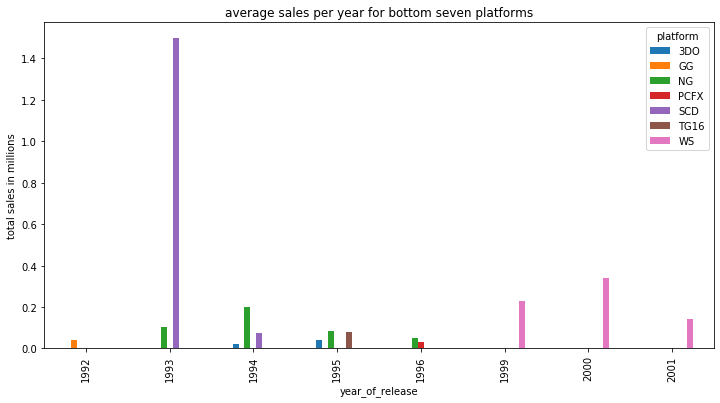

In [39]:
bottom_ax = bottom_seven_data.plot(xticks=top_six_data.index, kind='bar', figsize=(12, 6))
plt.title('average sales per year for bottom seven platforms')
bottom_ylab = bottom_ax.set_ylabel('total sales in millions')
plt.show()

***4.b.4. How long does it generally take for new platforms to appear and old ones to fade?***

In [40]:
# find platform lifespans
platform_lifespan = games.groupby('platform')['year_of_release'].max() - games.groupby('platform')['year_of_release'].min()
avg_platform_lifespan = platform_lifespan.mean()
print('Average platform lifespand:\n{:0.1f}'.format(avg_platform_lifespan))

Average platform lifespand:
7.6


***4.b. Conclusions***
1. Look at how sales varied from platform to platform. 
    - Most platforms dont have total sales over 400 million
2. Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
    - top 6: PS, PS2, PS3, DS, Wii, X360
    - each platform apears to have a peak of revenue generation, spanning 1985 - 2016
        - The Wii and SCD had massive sales in what appears to be their release year, perhaps there was a lot of excitement around its release.
3. Find platforms that used to be popular but now have zero sales. 
    - bottom 7: PCFX, GG, 3DO, TG16, WS, NG, SCD
    - each platform appears to have a peak of revenue generation, all before 2001
4. How long does it generally take for new platforms to appear and old ones to fade?
    - 7.6 years

<div class="alert alert-warning" role="alert">
Student comment v. 1:
    
- I am going to use the data since 2014 starting now because the previous 4 steps require all of the data for proper analysis
    


<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

<font color='red'><b><u> V.2. New 4.c. Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017. </u></b></font>

In [41]:
# perform query to obtain data for 2014-2016
new_games = games.query('year_of_release > 2013')
print('data from 2014 - 2016')
new_games.head()

data from 2014 - 2016


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [42]:
print('number of games released for each year in narrowed data set')
new_games['year_of_release'].value_counts()

number of games released for each year in narrowed data set


2015    606
2014    581
2016    502
Name: year_of_release, dtype: int64

<font color='red'><b><u> V.2. New 4.c. Conclusion Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017. </u></b></font>
- This data should be used because:
    - there is a stabalization in the number of games released per year
    - there is a downward trend in the top 6 performing platforms, suggesting they are at their end of lifespan

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 2:
    
Ok, but please see my explanation above.
</div>

***4.c. Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.***

    ***Work only with the data that you've decided is relevant. Disregard the data for previous years.***
- if the average platform lifespan is 7.6 years, 8-10 years before the year in question is approptiate
- I will be using the previous decade + 1 (2006-2016)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Please note that a typical lifespan of the platforms is about 10-11 year. Please note that lifespan is slightly decreasing with time.
</div>

In [43]:
# obtian desired information
last_decade = games.query('year_of_release > 2005')
print('data from 2006-2016')
last_decade.head()

data from 2006-2016


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


<font color='red'><b><u> V.2. New 4.d. Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms. </u></b></font>

In [44]:
# find max sales for each platform
new_platform_sales = new_games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
print('total sales per platform')
new_platform_sales.head()

total sales per platform


,total_sales
platform,
3DS,86.68
PC,27.05
PS3,68.18
PS4,288.15
PSP,0.36


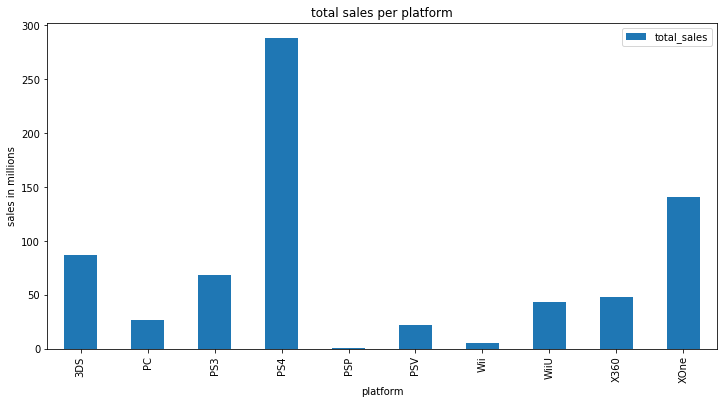

In [45]:
# graph the results
new_platform_sales.plot(kind='bar', figsize=(12, 6))
plt.title('total sales per platform')
plt.ylabel('sales in millions')
plt.show()

In [46]:
# take a look at the top 5 platform sales
new_sorted_sales = new_platform_sales.sort_values(by='total_sales', ascending=False)
print('top 5 platform sales')
new_sorted_sales.head()

top 5 platform sales


,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


In [47]:
# take a look at the bottom 5 platform sales
new_sorted_sales = new_platform_sales.sort_values(by='total_sales', ascending=False)
print('bottom 5 platform sales')
new_sorted_sales.tail()

bottom 5 platform sales


,total_sales
platform,
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07
PSP,0.36


<font color='red'><b><u> V.2. New 4.d. Conclusion Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms </u></b></font>

- Top five sales:
    - PS4
    - XOne
    - 3DS
    - PS3
    - X360
- Bottom five sales:
    - WiiU
    - PC
    - PSV
    - Wii
    - PSP

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
👍👍👍
</div>

***4.d. Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms***

In [48]:
# find max sales for each platform
platform_sales = last_decade.pivot_table(index='platform', values='total_sales', aggfunc='sum')
print('total sales per platform')
platform_sales.head()

total sales per platform


,total_sales
platform,
3DS,257.81
DC,0.06
DS,655.35
GBA,8.68
GC,11.53


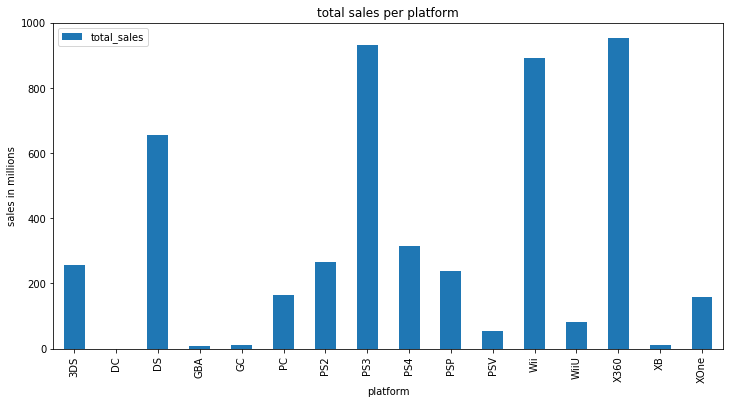

In [49]:
# graph the results
platform_sales.plot(kind='bar', figsize=(12, 6))
plt.title('total sales per platform')
plt.ylabel('sales in millions')
plt.show()

In [50]:
# take a look at the top 5 platform sales
sorted_sales = platform_sales.sort_values(by='total_sales', ascending=False)
print('top 5 platform sales')
sorted_sales.head()

top 5 platform sales


,total_sales
platform,
X360,952.99
PS3,931.34
Wii,891.18
DS,655.35
PS4,314.14


***4.d. Conclusion***
- Which platforms are leading in sales? 
    - DS, PS3, Wii, X360 are leading in sales
- Which ones are growing or shrinking? 
    - all other platforms are shrinking

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Platforms with the highest sales are correctly defined.
</div>

<font color='red'><b><u> V.2. New 4.e. Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings. </u></b></font>

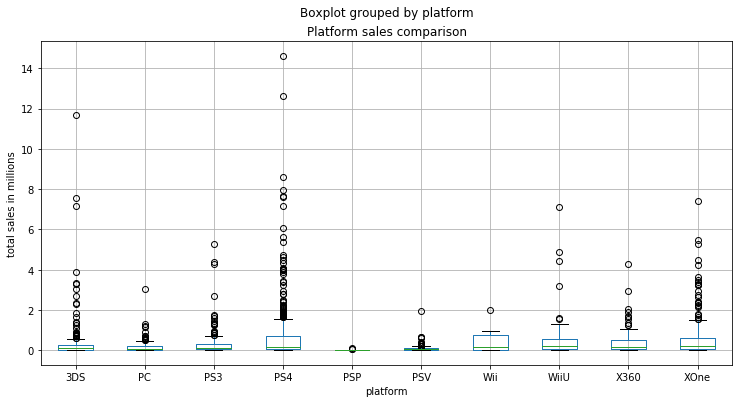

In [51]:
# create box plots for global sales per platform
new_games.boxplot(column='total_sales', by='platform', figsize=(12, 6))
plt.title('Platform sales comparison')
plt.xlabel('platform')
plt.ylabel('total sales in millions')
plt.show()

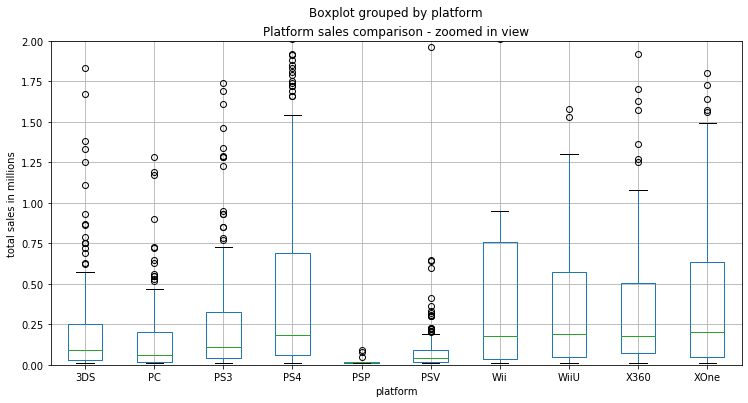

In [52]:
# take a closer look at the box plots
new_games.boxplot(column='total_sales', by='platform', figsize=(12, 6))
plt.title('Platform sales comparison - zoomed in view')
plt.xlabel('platform')
plt.ylabel('total sales in millions')
plt.ylim(0, 2)
plt.show()

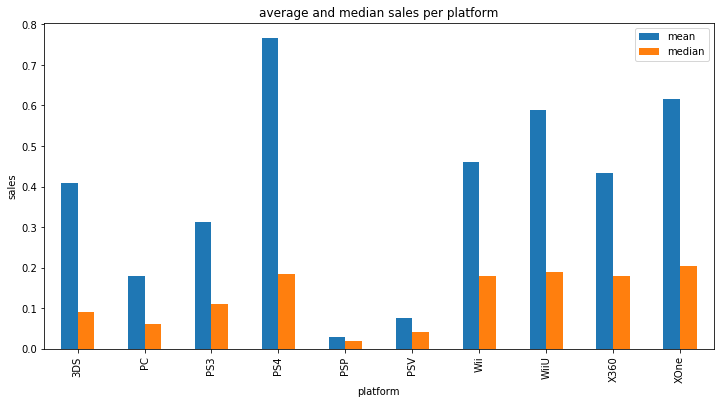

In [53]:
# find the average sales for each platform
new_platform_avg = new_games.pivot_table(index='platform', values='total_sales', aggfunc=('mean', 'median'))
new_platform_avg.plot(kind='bar', figsize=(12, 6))
plt.title('average and median sales per platform')
plt.xlabel('platform')
plt.ylabel('sales')
plt.show()

<font color='red'><b><u> V.2. New 4.e. Conclusion Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings. </u></b></font>

- Are the differences in sales significant? 
    - Yes: sales for PS4, Wii, WiiU, X360, and XOne are higher than other platforms
- What about average sales on various platforms?
    - 3DS, PS4, Wii, WiiU, X360, XOne all have average sales over .4 million
- General Conclusions:
    - The average sales are higher than the median, this means that there are large outliers, causing the average to be high. This is proven/represented in the boxplot graphs

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you correctly noted that we have an outliers.
</div>

***4.e. Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.***

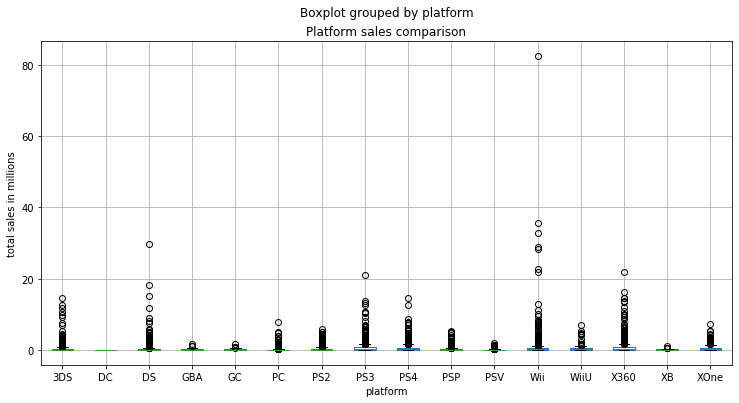

In [54]:
# create box plots for global sales per platform
last_decade.boxplot(column='total_sales', by='platform', figsize=(12, 6))
plt.title('Platform sales comparison')
plt.xlabel('platform')
plt.ylabel('total sales in millions')
plt.show()

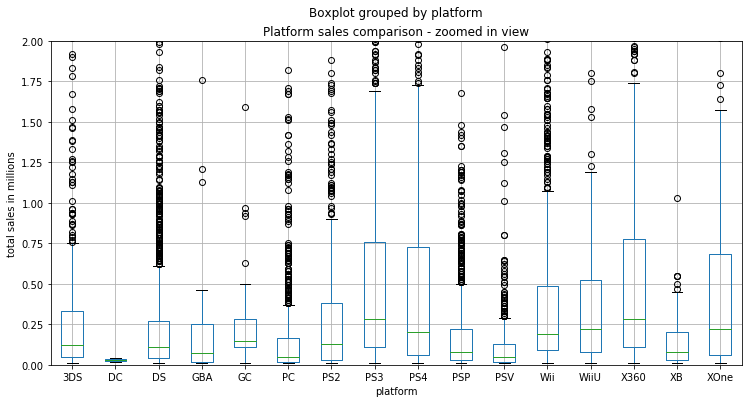

In [55]:
# take a closer look at the box plots
last_decade.boxplot(column='total_sales', by='platform', figsize=(12, 6))
plt.title('Platform sales comparison - zoomed in view')
plt.xlabel('platform')
plt.ylabel('total sales in millions')
plt.ylim(0, 2)
plt.show()

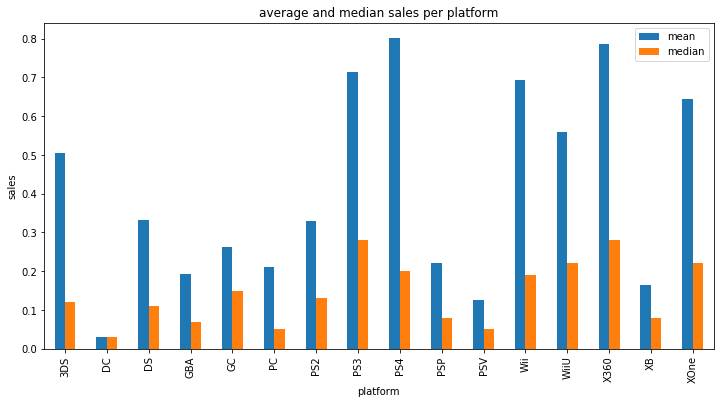

In [56]:
# find the average sales for each platform
platform_avg = last_decade.pivot_table(index='platform', values='total_sales', aggfunc=('mean', 'median'))
platform_avg.plot(kind='bar', figsize=(12, 6))
plt.title('average and median sales per platform')
plt.xlabel('platform')
plt.ylabel('sales')
plt.show()

***4.e. Conclusion***

Build a box plot for the global sales of all games, broken down by platform. 

- Are the differences in sales significant? 
    - Yes: sales for PS3, PS4, Wii, WiiU, X360, and XOne are higher than other platforms
- What about average sales on various platforms?
    - 3DS, PS3, PS4, Wii, WiiU, X260, XOne all have average sales over .4 million
- General Conclusions:
    - The average sales are higher than the median, this means that there are large outliers, causing the average to be high. This is proven/represented in the boxplot graphs

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you plotted boxplots and described an outliers.
    
Please see additional materials: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
</div>

<font color='red'><b><u> V.2. New 4. f. Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions. </u></b></font>

- I choose to examine the PS4 more closely

In [57]:
# obtain needed information
ps4_data = new_games.query('platform == "PS4"')
print('PS4 dataframe')
ps4_data.head()

PS4 dataframe


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


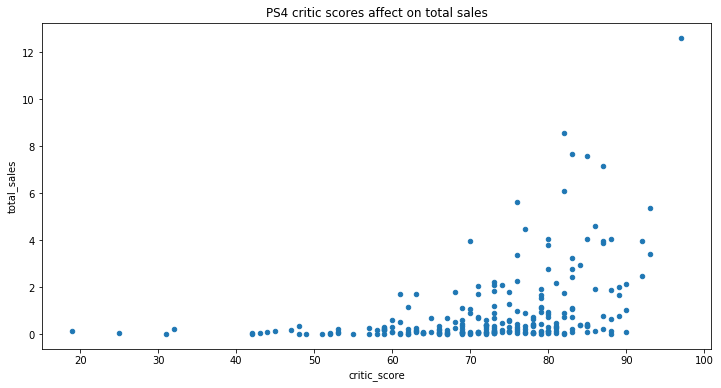

Correlation between critic scores and sales: 0.40266141068104083


In [58]:
# scatter plot of critic score affect on total sales
ps4_data.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(12, 6))
plt.title('PS4 critic scores affect on total sales')
plt.show()

print('Correlation between critic scores and sales:', ps4_data['critic_score'].corr(ps4_data['total_sales']))

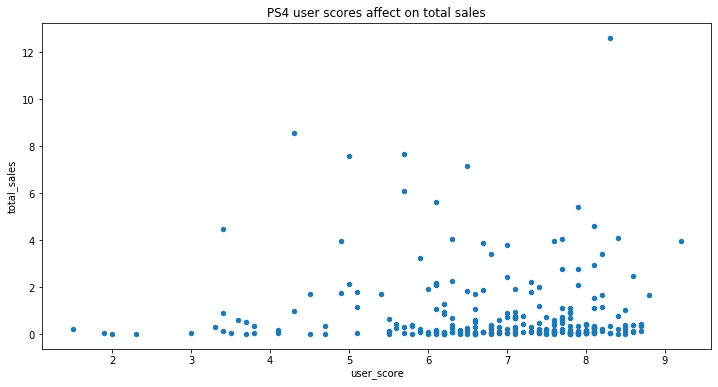

Correlation between user scores and sales: -0.03501047705575576


In [59]:
# scatter plot of user score affect on total sales
ps4_data.plot(kind='scatter', x='user_score', y='total_sales', figsize=(12, 6))
plt.title('PS4 user scores affect on total sales')
plt.show()

print('Correlation between user scores and sales:', ps4_data['user_score'].corr(ps4_data['total_sales']))

<font color='red'><b><u> V.2. New 4. f. Conclusion Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions. </u></b></font>

- There is a mild correlation between critic score and sales for the PS4
- There is a very low negative correlation between user score and sales for the PS4

***4. f. Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.***
- I choose to examine the PS3 more closely

In [60]:
# obtain needed information
ps3_data = last_decade.query('platform == "PS3"')
print('PS3 dataframe')
ps3_data.head()

PS3 dataframe


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70


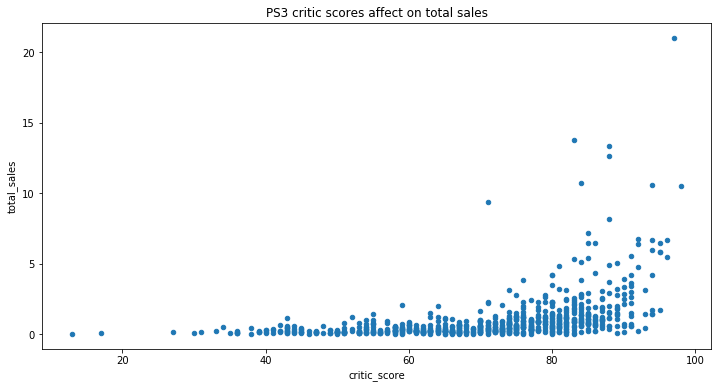

Correlation between critic scores and sales: 0.4327589578997135


In [61]:
# scatter plot of critic score affect on total sales
ps3_data.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(12, 6))
plt.title('PS3 critic scores affect on total sales')
plt.show()

print('Correlation between critic scores and sales:', ps3_data['critic_score'].corr(ps3_data['total_sales']))

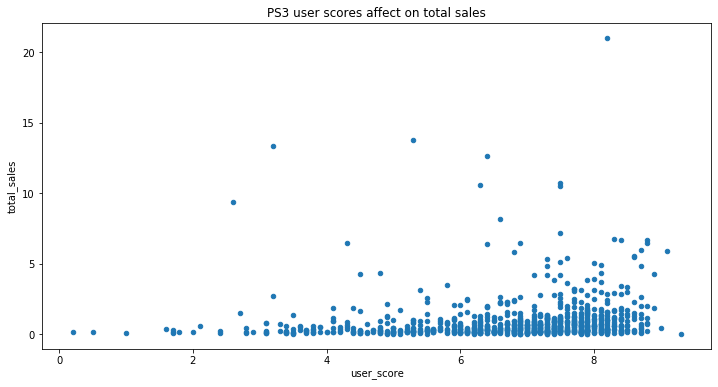

Correlation between user scores and sales: 0.12328238779204477


In [62]:
# scatter plot of user score affect on total sales
ps3_data.plot(kind='scatter', x='user_score', y='total_sales', figsize=(12, 6))
plt.title('PS3 user scores affect on total sales')
plt.show()

print('Correlation between user scores and sales:', ps3_data['user_score'].corr(ps3_data['total_sales']))

***4.f. Conclusion***
- There is a mild correlation between critic score and sales for the PS3
- There is a very low correlation between user score and sales for the PS3

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, we have weak correlation between variables. Please note that correlation function shows only linear dependecy between variables. Maybe this link will be interesting for you: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/.
</div>

<font color='red'><b><u> V.2. New 4.g. Keeping your conclusions in mind, compare the sales of the same games on other platforms. </u></b></font>

In [63]:
# create a list of the games made for the PS4
ps4_game_list = list(ps4_data['name'])
print('games made for the PS4')
ps4_game_list

games made for the PS4


['Call of Duty: Black Ops 3',
 'Grand Theft Auto V',
 'FIFA 16',
 'Star Wars Battlefront (2015)',
 'Call of Duty: Advanced Warfare',
 'FIFA 17',
 'Fallout 4',
 'FIFA 15',
 'Destiny',
 "Uncharted 4: A Thief's End",
 'The Last of Us',
 'Uncharted: The Nathan Drake Collection',
 'Call of Duty: Infinite Warfare',
 'Minecraft',
 'Battlefield 1',
 'Watch Dogs',
 'Far Cry 4',
 'The Witcher 3: Wild Hunt',
 "Assassin's Creed: Unity",
 'Batman: Arkham Knight',
 'NBA 2K16',
 "Tom Clancy's The Division",
 'Metal Gear Solid V: The Phantom Pain',
 "Assassin's Creed Syndicate",
 'Madden NFL 16',
 'Middle-Earth: Shadow of Mordor',
 'inFAMOUS: Second Son',
 'Mortal Kombat X',
 'Bloodborne',
 'NBA 2K15',
 'Need for Speed (2015)',
 'Far Cry: Primal',
 "Tom Clancy's Rainbow Six: Siege",
 'Madden NFL 15',
 'Overwatch',
 'Battlefield: Hardline',
 'Dying Light',
 'DriveClub',
 'Dragon Age: Inquisition',
 'Destiny: The Taken King',
 'LittleBigPlanet 3',
 'NBA 2K17',
 'Just Cause 3',
 'Diablo III',
 'Mafia III

In [64]:
# find the games from the PS4 list that were also made for other platforms
same_new_games = new_games.query('name in @ps4_game_list')
print('dataframe of games for PS4 that were also made for other platforms')
same_new_games.head()

dataframe of games for PS4 that were also made for other platforms


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


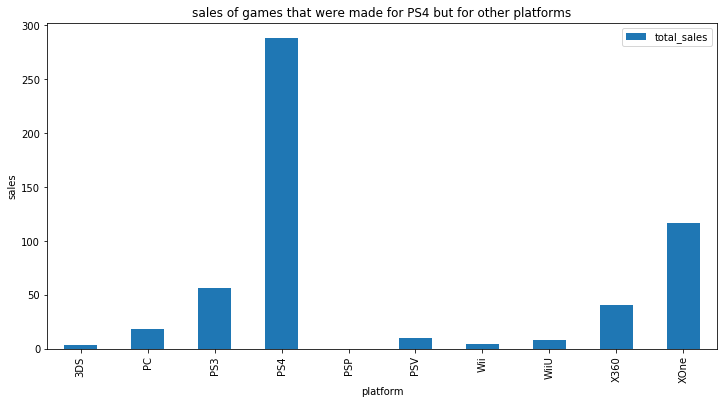

In [65]:
# graph the results
same_new_game_sales = same_new_games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
same_new_game_sales.plot(kind='bar', figsize=(12, 6))
plt.title('sales of games that were made for PS4 but for other platforms')
plt.ylabel('sales')
plt.show()

<font color='red'><b><u> V.2. New 4.g. Conclusion Keeping your conclusions in mind, compare the sales of the same games on other platforms. </u></b></font>

- The sales for games that were made for PS4 that were also made for other platforms did well for the XOne and a half as well as that in the PS3 and X360

***4.g. Keeping your conclusions in mind, compare the sales of the same games on other platforms.***

In [66]:
# create a list of the games made for the PS3
ps3_game_list = list(ps3_data['name'])
print('games made for the PS3')
ps3_game_list

games made for the PS3


['Grand Theft Auto V',
 'Call of Duty: Black Ops II',
 'Call of Duty: Modern Warfare 3',
 'Call of Duty: Black Ops',
 'Gran Turismo 5',
 'Call of Duty: Modern Warfare 2',
 'Grand Theft Auto IV',
 'Call of Duty: Ghosts',
 'FIFA Soccer 13',
 'Battlefield 3',
 "Uncharted 3: Drake's Deception",
 'Call of Duty 4: Modern Warfare',
 'Uncharted 2: Among Thieves',
 'FIFA 12',
 'Red Dead Redemption',
 'FIFA 14',
 "Assassin's Creed III",
 'The Elder Scrolls V: Skyrim',
 'Metal Gear Solid 4: Guns of the Patriots',
 'The Last of Us',
 'LittleBigPlanet',
 "Assassin's Creed II",
 'Batman: Arkham City',
 'Call of Duty: World at War',
 'Final Fantasy XIII',
 'Minecraft',
 'Resident Evil 5',
 'FIFA Soccer 11',
 "Uncharted: Drake's Fortune",
 "Assassin's Creed",
 'God of War III',
 'Call of Duty: Advanced Warfare',
 'Resistance: Fall of Man',
 'FIFA 15',
 'Batman: Arkham Asylum',
 "Assassin's Creed: Revelations",
 'Gran Turismo 5 Prologue',
 'Street Fighter IV',
 'Fallout 3',
 'MotorStorm',
 'Sports Cham

In [67]:
# find the games from the PS3 list that were also made for other platforms
same_games = last_decade.query('name in @ps3_game_list and platform != "PS3"')
print('dataframe of games for PS3 that were also made for other platforms')
same_games.head()

dataframe of games for PS3 that were also made for other platforms


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


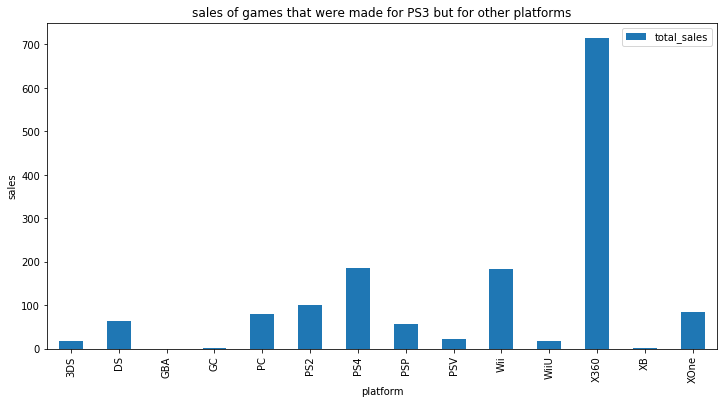

In [68]:
# graph the results
same_game_sales = same_games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
same_game_sales.plot(kind='bar', figsize=(12, 6))
plt.title('sales of games that were made for PS3 but for other platforms')
plt.ylabel('sales')
plt.show()

***4.g. Conclusion***
- The sales for games that were made for PS3 that were also made for other platforms did well for the X360

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
👍👍👍
</div>

<font color='red'><b><u> V.2. New 4.h. Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales? </u></b></font>

In [69]:
# obtain needed information
new_sales_per_genre_sum = new_games.pivot_table(index='genre', values='total_sales', aggfunc='sum')
print('total sales for each genre')
new_sales_per_genre_sum

total sales for each genre


,total_sales
genre,
Action,199.36
Adventure,17.55
Fighting,28.22
Misc,37.55
Platform,18.09
Puzzle,2.21
Racing,27.52
Role-Playing,101.44
Shooter,170.94


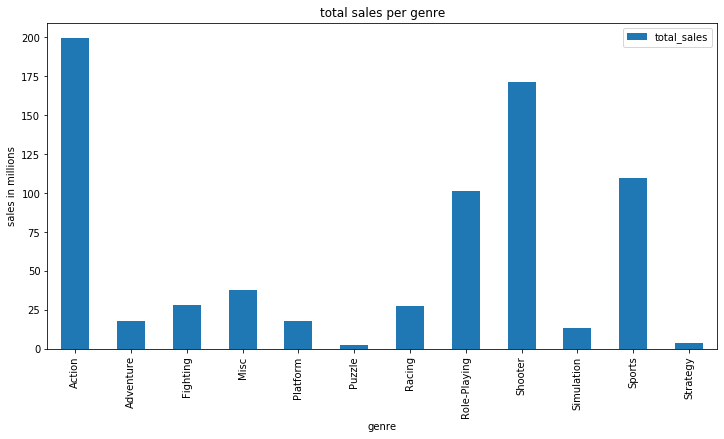

In [70]:
# plot the results
new_sales_per_genre_sum.plot(kind='bar', figsize=(12,6))
plt.title('total sales per genre')
plt.ylabel('sales in millions')
plt.show()

In [71]:
# examine the stats of each genre
new_sales_per_genre_stat = new_games.pivot_table(index='genre', values='total_sales', aggfunc=('mean', 'median'))
print('genre stats')
new_sales_per_genre_stat

genre stats


,mean,median
genre,,
Action,0.322068,0.090
Adventure,0.094865,0.030
Fighting,0.470333,0.125
Misc,0.332301,0.090
Platform,0.476053,0.140
Puzzle,0.157857,0.045
Racing,0.398841,0.090
Role-Playing,0.459005,0.110
Shooter,1.335469,0.515


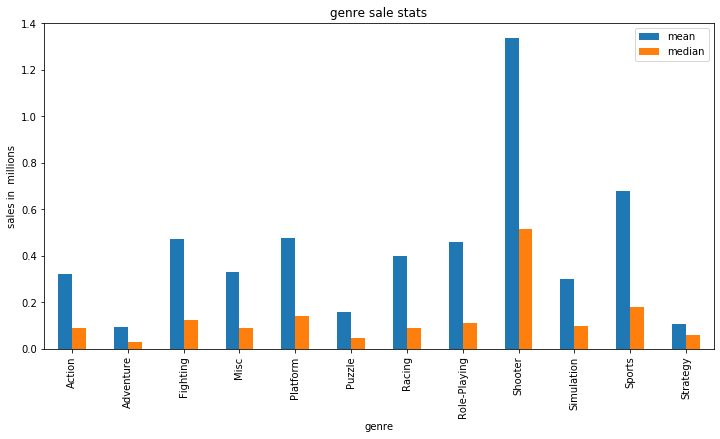

In [72]:
# plot the sales per genre stats
new_sales_per_genre_stat.plot(kind='bar', figsize=(12, 6))
plt.title('genre sale stats')
plt.ylabel('sales in  millions')
plt.show()

<font color='red'><b><u> V.2. New 4.h. Conclusion Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales? </u></b></font>

- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? 
    - Action, Sports, Shooter, and Role Playing genres have the most sales
    - Based on average sales, Shooter genre makes the most, with Sports genre in second (about 1/2 of Shooter), all others are under 0.6 million
- Can you generalize about genres with high and low sales?
    - Those with high sales may be more fast paced, require less strategy and concentration, offer instant gratification in terms of points or level ups, may also be easier to pick up and put down
    - Those with lower sales may require more strategy and concentration, may be slower paced and offer less points or level up opportunities, they may also not be easy to put down and pick back up with out practicing again

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you correctly defined the most popular genres. Well done that you have explained it.
</div>

***4.h. Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?***

In [73]:
# obtain needed information
sales_per_genre_sum = last_decade.pivot_table(index='genre', values='total_sales', aggfunc='sum')
print('total sales for each genre')
sales_per_genre_sum

total sales for each genre


,total_sales
genre,
Action,1116.65
Adventure,141.35
Fighting,188.42
Misc,554.86
Platform,279.74
Puzzle,89.92
Racing,299.00
Role-Playing,522.40
Shooter,717.04


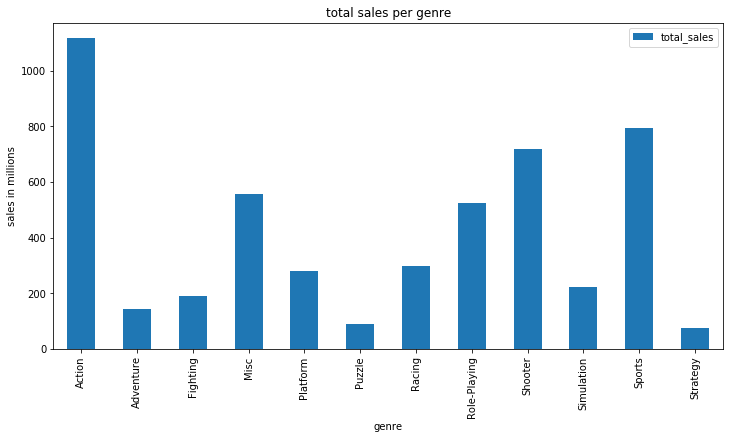

In [74]:
# plot the results
sales_per_genre_sum.plot(kind='bar', figsize=(12,6))
plt.title('total sales per genre')
plt.ylabel('sales in millions')
plt.show()

In [75]:
# examine the stats of each genre
sales_per_genre_stat = last_decade.pivot_table(index='genre', values='total_sales', aggfunc=('mean', 'median'))
print('genre stats')
sales_per_genre_stat

genre stats


,mean,median
genre,,
Action,0.468787,0.160
Adventure,0.138172,0.040
Fighting,0.456223,0.160
Misc,0.442825,0.130
Platform,0.822765,0.225
Puzzle,0.245683,0.080
Racing,0.532977,0.170
Role-Playing,0.524498,0.150
Shooter,0.972917,0.290


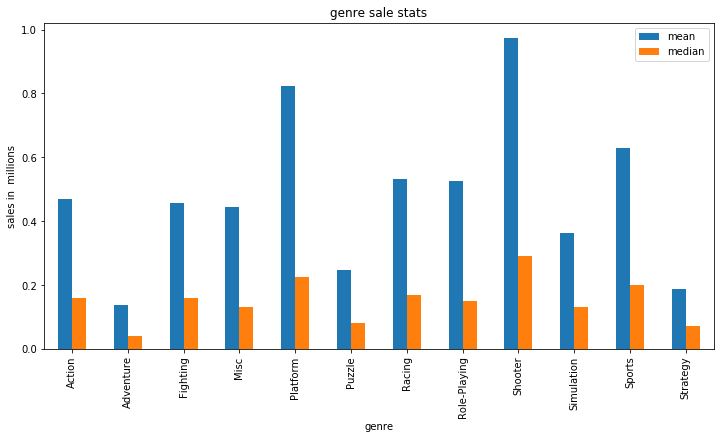

In [76]:
# plot the sales per genre stats
sales_per_genre_stat.plot(kind='bar', figsize=(12, 6))
plt.title('genre sale stats')
plt.ylabel('sales in  millions')
plt.show()

***4.h. Conclusion***
- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? 
    - Action, Sports, and Shooter genres have the most sales
- Can you generalize about genres with high and low sales?
    - Those with high sales may be more fast paced, require less strategy and concentration, offer instant gratification in terms of points or level ups, may also be easier to pick up and put down
    - Those with lower sales may require more strategy and concentration, may be slower paced and offer less points or level up opportunities, they may also not be easy to put down and pick back up with out practicing again

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
An excellent data analysis :)
</div>

## Create a user profile for each region
- For each region (NA, EU, JP), determine:
    - 5.a. The top five platforms. Describe variations in their market shares from region to region.
    - 5.b. The top five genres. Explain the difference.
    - 5.c. Do ESRB ratings affect sales in individual regions?

<font color='red'><b><u> V.2. New 5.a. The top five platforms. Describe variations in their market shares from region to region. </u></b></font>

In [77]:
# obtain needed info
na_top_five_platforms = new_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
print('top 5 platorms in NA')
na_top_five_platforms.head()

top 5 platorms in NA


platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

In [78]:
# obtain needed info
eu_top_five_platforms = new_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
print('top 5 platorms in EU')
eu_top_five_platforms.head()

top 5 platorms in EU


platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

In [79]:
# obtain needed info
jp_top_five_platforms = new_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
print('top 5 platorms in JP')
jp_top_five_platforms.head()

top 5 platorms in JP


platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

In [80]:
# create a df with desired info
new_market_shares = new_games.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum()
print('dataframe of region sales per platform')
new_market_shares

dataframe of region sales per platform


,na_sales,eu_sales,jp_sales
platform,,,
3DS,22.64,16.12,44.24
PC,7.23,17.97,0.00
PS3,22.05,25.54,11.22
PS4,98.61,130.04,15.02
PSP,0.00,0.00,0.36
PSV,2.52,3.53,14.54
Wii,2.08,2.59,0.00
WiiU,19.36,13.15,7.31
X360,28.30,15.49,0.08


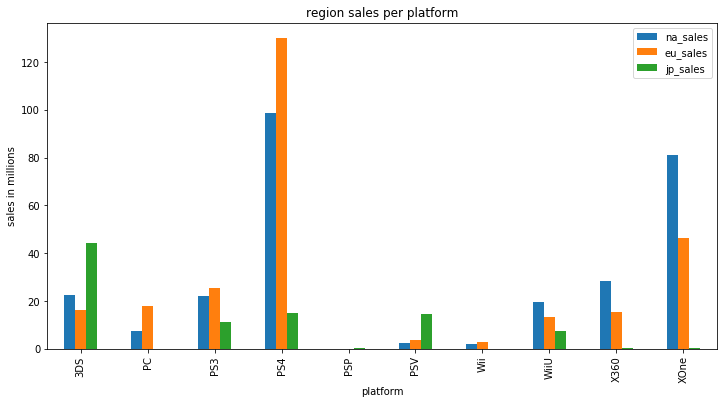

In [81]:
# plot the results
new_market_shares.plot(kind='bar', figsize=(12, 6))
plt.title('region sales per platform')
plt.ylabel('sales in millions')
plt.show()

<font color='red'><b><u> V.2. New 5.a. Conclusion The top five platforms. Describe variations in their market shares from region to region. </u></b></font>

- NA and EU have the same top 4 sales: PS4, XOne, 3DS, PS3
    - X360 and PC are in NA and EU top 5, respectively
    - these regions have top sales in a range of companies, playstation, xbox, pc, nintendo
- NA, EU, and JP share the same top 3 sales: PS4, 3DS, PS3: playstation and nintendo
- JP sales top sales also include PSV and WiiU
    - this region has top sales in 2 companies, playstatoin and nintendo

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right :)
</div>

***5.a. The top five platforms. Describe variations in their market shares from region to region.***

In [82]:
# obtain needed info
na_top_five_plats = last_decade.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
print('top 5 platorms in NA')
na_top_five_plats.head()

top 5 platorms in NA


platform
X360    588.84
Wii     486.87
PS3     390.13
DS      323.99
PS2     114.89
Name: na_sales, dtype: float64

In [83]:
# obtain needed info
eu_top_five_plats = last_decade.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
print('top 5 platorms in EU')
eu_top_five_plats.head()

top 5 platorms in EU


platform
PS3     327.21
X360    267.89
Wii     258.32
DS      142.99
PS4     141.09
Name: eu_sales, dtype: float64

In [84]:
# obtain needed info
jp_top_five_plats = last_decade.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
print('top 5 platorms in JP')
jp_top_five_plats.head()

top 5 platorms in JP


platform
DS     141.49
3DS    100.62
PS3     79.41
PSP     70.63
Wii     68.28
Name: jp_sales, dtype: float64

In [85]:
# create a df with desired info
market_shares = last_decade.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum()
print('dataframe of region sales per platform')
market_shares #.sort_values(by='na_sales', ascending=False)

dataframe of region sales per platform


,na_sales,eu_sales,jp_sales
platform,,,
3DS,82.65,61.27,100.62
DC,0.00,0.00,0.06
DS,323.99,142.99,141.49
GBA,5.15,1.88,1.51
GC,8.72,2.34,0.21
PC,44.45,100.32,0.00
PS2,114.89,46.28,35.93
PS3,390.13,327.21,79.41
PS4,108.74,141.09,15.96


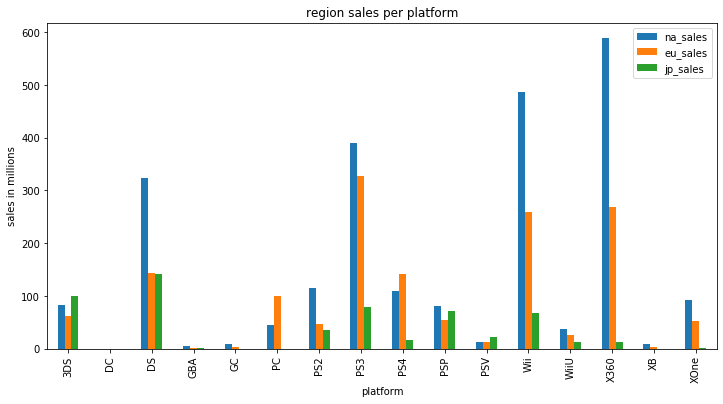

In [86]:
# plot the results
market_shares.plot(kind='bar', figsize=(12, 6))
plt.title('region sales per platform')
plt.ylabel('sales in millions')
plt.show()

***5.a. Conclusion***

The top five platforms. Describe variations in their market shares from region to region.
- NA and EU have the same top 4 sales: PS3, Wii, X360, DS, covering a range of platforms
- JP sales top sales are in play sataion and nintendo platforms

<font color='red'><b><u> V.2. New 5.b. The top five genres. Explain the difference. </u></b></font>

In [87]:
# obtain needed info
new_na_top_five_genres = new_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
print('top 5 genres in NA')
new_na_top_five_genres.head()

top 5 genres in NA


genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

In [88]:
# obtain needed info
new_eu_top_five_genres = new_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
print('top 5 genres in EU')
new_eu_top_five_genres.head()

top 5 genres in EU


genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

In [89]:
# obtain needed info
new_jp_top_five_genres = new_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
print('top 5 genres in JP')
new_jp_top_five_genres.head()

top 5 genres in JP


genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

In [90]:
# create a df with desired info
new_market_genres = new_games.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()
print('dataframe of region sales per genre')
new_market_genres #.sort_values(by='na_sales', ascending=False)

dataframe of region sales per genre


,na_sales,eu_sales,jp_sales
genre,,,
Action,72.53,74.68,29.58
Adventure,5.64,6.49,3.60
Fighting,12.43,6.69,6.37
Misc,15.05,12.86,5.61
Platform,6.79,6.80,2.69
Puzzle,0.65,0.52,0.93
Racing,8.74,14.13,1.76
Role-Playing,33.47,28.17,31.16
Shooter,79.02,65.52,4.87


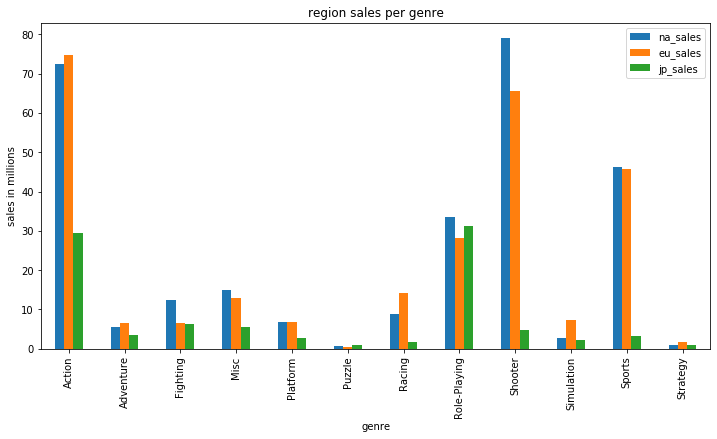

In [91]:
# plot the results
new_market_genres.plot(kind='bar', figsize=(12, 6))
plt.title('region sales per genre')
plt.ylabel('sales in millions')
plt.show()

<font color='red'><b><u> V.2. New 5.b. Conclusion The top five genres. Explain the difference. </u></b></font>

The top five genres. Explain the difference.
- Action and role playing are in the top 4 sales of each region
- NA, EU have the same top 4 genres: Action, Shooter, Sports, Role Playing
    - shooter and sports do not do well in JP
- JP has 2 top selling genres: action and role playing
- These differences could be explained by the type of games that are popular for a specific platform. JP has high sales in playstation role playing/action games. Where as NA and EU had sales across the same types of platforms, so it is likely the same genres would be popular too.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
You correctly noted that there is a difference in preferences between regions.
</div>

***5.b. The top five genres. Explain the difference.***

In [92]:
# obtain needed info
na_top_five_genres = last_decade.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
print('top 5 genres in NA')
na_top_five_genres.head()

top 5 genres in NA


genre
Action          530.44
Sports          396.64
Shooter         373.13
Misc            285.06
Role-Playing    199.63
Name: na_sales, dtype: float64

In [93]:
# obtain needed info
eu_top_five_genres = last_decade.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
print('top 5 genres in EU')
eu_top_five_genres.head()

top 5 genres in EU


genre
Action     350.70
Sports     251.55
Shooter    238.89
Misc       146.88
Racing     113.39
Name: eu_sales, dtype: float64

In [94]:
# obtain needed info
jp_top_five_genres = last_decade.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
print('top 5 genres in JP')
jp_top_five_genres.head()

top 5 genres in JP


genre
Role-Playing    170.38
Action          102.07
Misc             64.53
Sports           48.97
Platform         35.20
Name: jp_sales, dtype: float64

In [95]:
# create a df with desired info
market_genres = last_decade.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()
print('dataframe of region sales per genre')
market_genres #.sort_values(by='na_sales', ascending=False)

dataframe of region sales per genre


,na_sales,eu_sales,jp_sales
genre,,,
Action,530.44,350.70,102.07
Adventure,61.52,37.90,29.53
Fighting,94.31,42.63,28.61
Misc,285.06,146.88,64.53
Platform,134.25,81.62,35.20
Puzzle,42.49,27.77,12.43
Racing,132.93,113.39,13.20
Role-Playing,199.63,110.62,170.38
Shooter,373.13,238.89,19.35


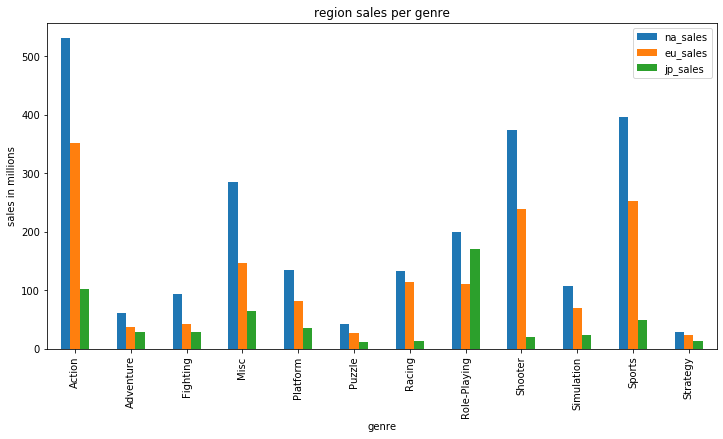

In [96]:
# plot the results
market_genres.plot(kind='bar', figsize=(12, 6))
plt.title('region sales per genre')
plt.ylabel('sales in millions')
plt.show()

***5.b. Conclusion***

The top five genres. Explain the difference.
- NA, EU, JP have the same top 3 genres: Action, Sports, Misc
- NA, EU also share Shooter as a top 4
- JP top sales are from role playing games which is not in NA or EU top 5
- These differences could be explained by the type of games that are popular for a specific platform. JP has better sales in playstation and nintendo platforms which make a lot of role playing and platform games. Where as NA and EU had sales across the same types of platforms, so it is likely the same genres would be popular too.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right :)
</div>

<font color='red'><b><u> V.2. New 5.c. Do ESRB ratings affect sales in individual regions? </u></b></font>

In [97]:
# obtian neeeded info
new_ratings_vs_sales = new_games.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()
print('region sales per ESRB rating')
new_ratings_vs_sales

region sales per ESRB rating


,na_sales,eu_sales,jp_sales
rating,,,
E,50.74,58.06,8.94
E10+,33.23,26.16,4.46
M,96.42,93.44,8.01
T,38.95,34.07,14.78


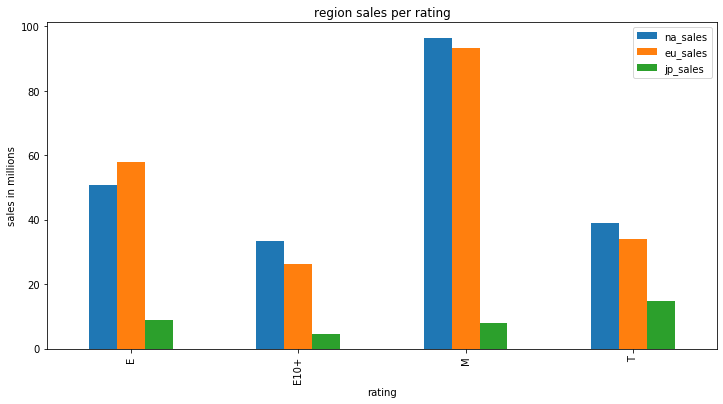

In [98]:
# graph the results
new_ratings_vs_sales.plot(kind='bar', figsize=(12, 6))
plt.title('region sales per rating')
plt.ylabel('sales in millions')
plt.show()

<font color='red'><b><u> V.2. New 5.c. Conclusion Do ESRB ratings affect sales in individual regions? </u></b></font>

Do ESRB ratings affect sales in individual regions?
- Those rated M do the best in NA and EU - this is likely due to the genres that are popular, shooter for example
    - those rated E do second best followed by T and E10+
- Those rated T do the best in JP
    - followed by E, M, and E10+

***5.c. Do ESRB ratings affect sales in individual regions?***

In [99]:
# obtian neeeded info
ratings_vs_sales = last_decade.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()
print('region sales per ESRB rating')
ratings_vs_sales

region sales per ESRB rating


,na_sales,eu_sales,jp_sales
rating,,,
E,796.98,461.09,120.36
E10+,315.40,173.35,36.57
EC,1.32,0.00,0.00
M,574.33,398.90,43.79
RP,0.00,0.03,0.00
T,424.14,235.44,83.90


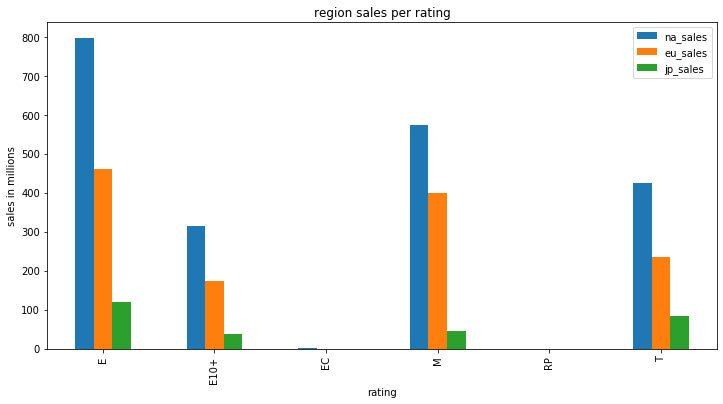

In [100]:
# graph the results
ratings_vs_sales.plot(kind='bar', figsize=(12, 6))
plt.title('region sales per rating')
plt.ylabel('sales in millions')
plt.show()

***5.c. Conclusion***

Do ESRB ratings affect sales in individual regions?
- Yes: E, E10+, M, and T rated games sell in all regions
- E, M, T have the best sales in all regions
- EC, and RP have little to no sales in all regions

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
👍👍👍
</div>

##  Answer hypothesis questions
    
***Plan of Action***
- Formulate the null and alternative hypotheses
- Obtain needed information to perform tests
    - tables
    - queries
- Evaluate dispersion of data sets
    - if the dispersion is similar then the parameter `equal_var=True`
    - if the dispersion is not similar then the parameter `equal_var=False`
- Perform tests

***Formulate null and alternative hypotheses***
- Hypothesis One:
    - Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
    - Alternative hypothesis: Average user ratings of the Xbox One and PC platforms are not the same.
    
- Hypothesis Two:
    - Null hypothesis: Average user ratings for the Action and Sports genres are the same.
    - Alternative hypothesis: Average user ratings for the Action and Sports genres are different.

<font color='red'><b><u> V.2. New 6.a. Test Hypothesis One </u></b></font>

- Hypothesis One:
    - Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
    - Alternative hypothesis: Average user ratings of the Xbox One and PC platforms are not the same.
    
***Obtain needed information***
- need user ratings for xbox one and pc platforms

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
It's great that you formulated the null and alternative hypotheses explicitly.
</div>

In [101]:
print('platform counts')
new_games['platform'].value_counts(dropna=False)

platform counts


PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

In [102]:
# obtain needed info
new_xone_and_pc = new_games.query('platform == "XOne" or platform == "PC"')
# confirm obtained correct information
print('confirmation that the correct infomation was obtained')
new_xone_and_pc['platform'].value_counts()

confirmation that the correct infomation was obtained


XOne    228
PC      151
Name: platform, dtype: int64

In [103]:
# remove scores with NaNs
new_xone_and_pc_clean = new_xone_and_pc.query('user_score != "NaN"')
print('dataframe with NaNs removed from user_score column')
new_xone_and_pc_clean.head()

dataframe with NaNs removed from user_score column


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
241,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
269,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
372,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


In [104]:
# obtain xone data
new_xone_data = new_xone_and_pc_clean.query('platform == "XOne"')
print('dataframe with XOne data only')
new_xone_data.head()

dataframe with XOne data only


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
241,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
269,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
372,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


In [105]:
# make list of xone user ratings
new_xone_user_ratings_list = list(new_xone_data['user_score'])
print('list of XOne user scores')
new_xone_user_ratings_list

list of XOne user scores


[7.9,
 5.4,
 6.4,
 6.2,
 4.1,
 5.5,
 7.5,
 4.4,
 7.2,
 6.4,
 5.5,
 3.1,
 6.1,
 6.2,
 8.2,
 5.4,
 6.9,
 7.9,
 6.3,
 7.5,
 5.8,
 6.4,
 6.6,
 8.2,
 7.3,
 8.0,
 8.0,
 6.2,
 6.9,
 9.2,
 6.1,
 7.8,
 8.4,
 5.9,
 5.1,
 5.2,
 7.7,
 7.4,
 5.6,
 6.2,
 6.9,
 7.0,
 6.4,
 7.7,
 7.3,
 7.4,
 7.8,
 7.3,
 6.7,
 5.9,
 5.1,
 4.6,
 5.1,
 5.7,
 8.0,
 5.7,
 6.8,
 5.1,
 7.5,
 6.9,
 7.8,
 8.1,
 6.0,
 6.4,
 6.3,
 7.8,
 7.1,
 6.0,
 6.9,
 3.2,
 8.6,
 7.7,
 5.1,
 6.6,
 7.9,
 6.1,
 7.2,
 8.5,
 7.0,
 5.4,
 4.3,
 6.8,
 5.5,
 5.8,
 5.3,
 7.1,
 5.5,
 4.0,
 8.3,
 6.8,
 6.7,
 6.8,
 7.3,
 7.0,
 8.3,
 7.0,
 7.2,
 4.4,
 7.0,
 8.3,
 7.5,
 8.0,
 7.2,
 6.6,
 7.3,
 4.1,
 7.9,
 8.7,
 6.0,
 5.7,
 8.0,
 2.1,
 8.2,
 5.6,
 7.2,
 6.2,
 5.3,
 7.5,
 6.0,
 3.1,
 7.6,
 8.5,
 6.5,
 6.8,
 6.3,
 5.8,
 7.7,
 6.9,
 8.4,
 5.2,
 4.9,
 7.1,
 7.1,
 6.1,
 8.1,
 6.3,
 6.0,
 8.9,
 7.7,
 1.6,
 8.0,
 5.4,
 8.1,
 4.3,
 7.7,
 7.4,
 4.3,
 7.1,
 5.8,
 4.2,
 6.6,
 7.3,
 7.2,
 7.1,
 6.7,
 8.8,
 7.9,
 8.1,
 3.1,
 7.5,
 6.3,
 8.2,
 7.1,
 6.8,
 6.0,
 8.2,
 6.6

In [106]:
# obtain pc data
new_pc_data = new_xone_and_pc_clean.query('platform == "PC"')
print('dataframe with PC info only')
new_pc_data.head()

dataframe with PC info only


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
455,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1515,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1710,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2273,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71.0,5.7,M,0.90
2746,Dragon Age: Inquisition,PC,2014,Role-Playing,0.33,0.34,0.0,0.06,85.0,5.9,M,0.73


In [107]:
# make list of pc user ratings
new_pc_user_ratings_list = list(new_pc_data['user_score'])
print('list of PC user scores')
new_pc_user_ratings_list

list of PC user scores


[3.9,
 5.4,
 7.9,
 5.7,
 5.9,
 9.3,
 8.0,
 6.7,
 6.2,
 3.0,
 6.8,
 8.3,
 5.9,
 6.0,
 8.2,
 4.7,
 5.8,
 4.5,
 7.6,
 5.5,
 8.0,
 6.9,
 7.5,
 6.2,
 4.2,
 5.9,
 5.9,
 7.3,
 7.3,
 7.1,
 6.9,
 7.3,
 5.9,
 4.4,
 7.9,
 3.2,
 8.6,
 4.3,
 7.1,
 4.8,
 6.4,
 7.4,
 8.4,
 5.3,
 8.9,
 3.8,
 3.0,
 7.3,
 2.5,
 7.1,
 7.9,
 6.0,
 7.0,
 4.2,
 7.3,
 5.7,
 5.7,
 4.8,
 4.3,
 7.6,
 5.7,
 6.9,
 8.0,
 7.5,
 7.7,
 8.6,
 4.4,
 5.8,
 6.8,
 6.8,
 2.9,
 8.2,
 6.9,
 7.4,
 3.6,
 5.1,
 5.4,
 7.5,
 8.6,
 4.3,
 8.0,
 7.6,
 7.1,
 4.0,
 7.7,
 7.0,
 3.5,
 4.8,
 6.1,
 6.3,
 8.7,
 6.8,
 7.6,
 6.9,
 4.8,
 6.1,
 6.2,
 7.7,
 7.8,
 1.4,
 3.7,
 2.4,
 8.5,
 5.4,
 7.4,
 8.3,
 8.7,
 8.3,
 5.3,
 4.3,
 6.2,
 6.3,
 7.7,
 6.8,
 7.3,
 7.1,
 7.1,
 7.1,
 8.3,
 6.8,
 7.9,
 1.4,
 7.6]

In [108]:
# calculate variance of the two lists
print('XOne dispersion: {}'.format(np.var(new_xone_user_ratings_list)))
print('PC dispersion: {}'.format(np.var(new_pc_user_ratings_list)))

XOne dispersion: 1.8554078089569157
PC dispersion: 2.886289906801507


<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you have checked variances.
</div>

***Test hypothesis one***

- Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
- Alternative hypothesis: Average user ratings of the Xbox One and PC platforms are not the same.

In [109]:
# Test a hypothesis about the means of two statistical populations based on samples taken from them

alpha = 0.05 # 5% as the critical statistical significance level

results = st.ttest_ind(
    new_xone_user_ratings_list, 
    new_pc_user_ratings_list,
        equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha: # your code: compare the p-value you get with the significance level):
    print("We reject the null hypothesis that the average user ratings of the Xbox One and PC platforms are the same.") 
    print("The alternative hypthosesis is true: The average user ratings of the Xbox One and PC platforms are not the same.")
else:
    print("We can't reject the null hypothesis that the average user ratings of the Xbox One and PC platforms are the same.")
    print("The null hypothesis is true: The average user ratings of the Xbox One and PC platforms are the same.")

p-value:  0.13130164268727834
We can't reject the null hypothesis that the average user ratings of the Xbox One and PC platforms are the same.
The null hypothesis is true: The average user ratings of the Xbox One and PC platforms are the same.


In [110]:
# calculate the averages of the two lists
new_xone_avg = sum(new_xone_user_ratings_list) / len(new_xone_user_ratings_list)
print('xbox one average user score: {:.2f}'.format(new_xone_avg))

new_pc_avg = sum(new_pc_user_ratings_list) / len(new_pc_user_ratings_list)
print('pc average user score: {:.2f}'.format(new_pc_avg))

xbox one average user score: 6.60
pc average user score: 6.31


###### <font color='red'><b><u> V.2. New 6.a. Test Hypothesis One Conclusion </u></b></font>

- The null hypothesis is true: the average user ratings of the Xbox One and PC platforms are the same.
- Although mathematically the averages are different, according to this test, they are not statistically significantly different
    - XOne: 6.60 vs PC: 6.31

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right. We don't have a statistically significant differences between average XBox One user ratings and PC user ratings.
</div>

# 6.a. Test Hypothesis One
- Hypothesis One:
    - Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
    - Alternative hypothesis: Average user ratings of the Xbox One and PC platforms are not the same.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you formulated the null and alternative hypotheses explicitly.
</div>

***Obtain needed information***
- need user ratings for xbox one and pc platforms

In [111]:
print('platform counts')
last_decade['platform'].value_counts(dropna=False)

platform counts


DS      1979
PS3     1305
Wii     1286
X360    1214
PSP     1083
PS2      804
PC       776
3DS      512
PSV      429
PS4      392
XOne     247
WiiU     147
XB        66
GBA       45
GC        44
DC         2
Name: platform, dtype: int64

In [112]:
# obtain needed info
xone_and_pc = last_decade.query('platform == "XOne" or platform == "PC"')
# confirm obtained correct information
print('confirmation that the correct infomation was obtained')
xone_and_pc['platform'].value_counts()

confirmation that the correct infomation was obtained


PC      776
XOne    247
Name: platform, dtype: int64

In [113]:
# remove scores with NaNs
xone_and_pc_clean = xone_and_pc.query('user_score != "NaN"')
print('dataframe with NaNs removed from user_score column')
xone_and_pc_clean.head()

dataframe with NaNs removed from user_score column


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T,8.01
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
191,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.00,0.54,88.0,4.0,M,5.14
217,StarCraft II: Wings of Liberty,PC,2010,Strategy,2.57,1.68,0.00,0.58,93.0,8.2,T,4.83


In [114]:
# obtain xone data
xone_data = xone_and_pc_clean.query('platform == "XOne"')
print('dataframe with XOne data only')
xone_data.head()

dataframe with XOne data only


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
241,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
269,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
372,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


In [115]:
# make list of xone user ratings
xone_user_ratings_list = list(xone_data['user_score'])
print('list of XOne user scores')
xone_user_ratings_list

list of XOne user scores


[7.9,
 5.4,
 6.4,
 6.2,
 4.1,
 5.5,
 7.5,
 4.4,
 7.2,
 6.4,
 4.3,
 5.5,
 3.1,
 6.1,
 6.2,
 8.2,
 7.4,
 5.9,
 5.4,
 6.9,
 6.6,
 7.9,
 6.3,
 7.5,
 6.8,
 5.8,
 6.4,
 6.6,
 8.2,
 6.1,
 7.3,
 8.0,
 8.0,
 6.2,
 6.9,
 9.2,
 6.1,
 7.8,
 8.4,
 5.9,
 5.1,
 5.2,
 5.8,
 7.7,
 7.4,
 5.6,
 6.8,
 6.2,
 6.9,
 5.7,
 7.0,
 6.4,
 5.9,
 7.7,
 7.3,
 7.4,
 5.8,
 7.8,
 7.3,
 6.7,
 5.9,
 5.1,
 4.6,
 5.1,
 5.7,
 8.0,
 5.7,
 6.8,
 5.1,
 7.5,
 6.9,
 7.8,
 8.1,
 6.0,
 6.4,
 6.3,
 7.0,
 7.8,
 7.1,
 6.0,
 6.9,
 3.2,
 8.6,
 7.7,
 5.1,
 6.6,
 7.9,
 6.1,
 7.2,
 5.5,
 8.5,
 7.0,
 5.4,
 4.3,
 6.8,
 5.5,
 5.8,
 5.3,
 7.1,
 5.5,
 4.0,
 6.2,
 8.3,
 6.8,
 6.7,
 6.8,
 3.1,
 7.3,
 3.0,
 7.0,
 8.3,
 7.0,
 7.2,
 4.4,
 7.0,
 6.9,
 8.3,
 7.5,
 8.0,
 7.2,
 6.6,
 7.3,
 4.1,
 7.9,
 8.7,
 6.0,
 5.7,
 8.0,
 2.1,
 8.2,
 5.6,
 7.2,
 6.2,
 5.3,
 7.5,
 6.0,
 3.1,
 7.6,
 8.5,
 6.5,
 6.8,
 6.3,
 5.8,
 7.7,
 6.9,
 8.4,
 5.2,
 4.9,
 7.1,
 7.1,
 6.1,
 8.1,
 6.3,
 6.0,
 8.9,
 7.7,
 1.6,
 8.0,
 5.4,
 8.1,
 4.3,
 7.7,
 7.4,
 4.3,
 7.1,
 5.8,
 4.2

In [116]:
# obtain pc data
pc_data = xone_and_pc_clean.query('platform == "PC"')
print('dataframe with PC info only')
pc_data.head()

dataframe with PC info only


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.0,0.60,86.0,7.6,T,8.01
191,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
217,StarCraft II: Wings of Liberty,PC,2010,Strategy,2.57,1.68,0.0,0.58,93.0,8.2,T,4.83
287,World of Warcraft: The Burning Crusade,PC,2007,Role-Playing,2.57,1.52,0.0,0.00,91.0,7.9,T,4.09
312,The Elder Scrolls V: Skyrim,PC,2011,Role-Playing,1.16,2.12,0.0,0.60,94.0,8.1,M,3.88


In [117]:
# make list of pc user ratings
pc_user_ratings_list = list(pc_data['user_score'])
print('list of PC user scores')
pc_user_ratings_list

list of PC user scores


[7.6,
 4.0,
 8.2,
 7.9,
 8.1,
 3.9,
 5.9,
 7.5,
 7.9,
 5.6,
 4.8,
 2.5,
 5.3,
 7.9,
 7.9,
 4.2,
 8.0,
 7.0,
 2.2,
 6.0,
 7.5,
 5.4,
 8.4,
 7.9,
 8.6,
 5.3,
 8.1,
 6.7,
 8.5,
 8.0,
 6.9,
 7.9,
 5.5,
 8.2,
 7.5,
 8.5,
 6.2,
 8.2,
 5.7,
 4.2,
 6.6,
 8.8,
 7.4,
 6.8,
 5.9,
 4.2,
 9.3,
 8.3,
 8.2,
 8.0,
 6.1,
 7.3,
 8.6,
 6.5,
 7.9,
 8.5,
 8.0,
 7.7,
 5.5,
 4.5,
 6.7,
 3.6,
 6.5,
 8.3,
 8.0,
 8.2,
 8.5,
 8.0,
 6.2,
 3.0,
 6.9,
 6.8,
 8.3,
 8.6,
 8.6,
 8.6,
 7.6,
 6.4,
 3.6,
 5.8,
 5.9,
 8.1,
 6.0,
 7.3,
 5.6,
 8.2,
 4.7,
 7.6,
 7.6,
 5.8,
 8.5,
 4.5,
 5.7,
 4.6,
 6.6,
 7.9,
 8.8,
 7.6,
 8.1,
 8.8,
 6.7,
 5.2,
 8.0,
 5.8,
 5.5,
 8.5,
 8.0,
 6.9,
 2.1,
 6.3,
 5.4,
 8.5,
 8.3,
 8.7,
 7.5,
 5.4,
 7.5,
 5.2,
 6.6,
 8.3,
 6.2,
 3.7,
 4.2,
 5.9,
 8.0,
 8.1,
 7.7,
 8.4,
 8.1,
 3.5,
 7.5,
 5.9,
 3.3,
 7.9,
 7.3,
 7.0,
 5.5,
 7.3,
 8.1,
 7.3,
 6.8,
 7.1,
 6.9,
 8.2,
 5.6,
 7.3,
 8.2,
 6.8,
 5.9,
 6.5,
 7.4,
 4.4,
 6.5,
 7.9,
 6.8,
 7.4,
 3.2,
 6.2,
 8.6,
 8.6,
 8.6,
 4.3,
 7.4,
 7.2,
 7.4,
 4.4,
 7.1

In [118]:
# calculate variance of the two lists
print('XOne dispersion: {}'.format(np.var(xone_user_ratings_list)))
print('PC dispersion: {}'.format(np.var(pc_user_ratings_list)))

XOne dispersion: 1.8747330898466033
PC dispersion: 2.2939431936


***Test hypothesis one***

- Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
- Alternative hypothesis: Average user ratings of the Xbox One and PC platforms are not the same.

In [119]:
# Test a hypothesis about the means of two statistical populations based on samples taken from them

alpha = 0.05 # 5% as the critical statistical significance level

results = st.ttest_ind(
    xone_user_ratings_list, 
    pc_user_ratings_list,
        equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha: # your code: compare the p-value you get with the significance level):
    print("We reject the null hypothesis that the average user ratings of the Xbox One and PC platforms are the same.") 
    print("The alternative hypthosesis is true: The average user ratings of the Xbox One and PC platforms are not the same.")
else:
    print("We can't reject the null hypothesis that the average user ratings of the Xbox One and PC platforms are the same.")
    print("The null hypothesis is true: The average user ratings of the Xbox One and PC platforms are the same.")

p-value:  0.0099665964482243
We reject the null hypothesis that the average user ratings of the Xbox One and PC platforms are the same.
The alternative hypthosesis is true: The average user ratings of the Xbox One and PC platforms are not the same.


In [120]:
# calculate the averages of the two lists
xone_avg = sum(xone_user_ratings_list) / len(xone_user_ratings_list)
print('xbox one average user score: {:.2f}'.format(xone_avg))

pc_avg = sum(pc_user_ratings_list) / len(pc_user_ratings_list)
print('pc average user score: {:.2f}'.format(pc_avg))

xbox one average user score: 6.52
pc average user score: 6.83


***6.a. Conclusion***
- The null hypothesis: the average user ratings of the Xbox One and PC platforms are the same is rejected. 
- the alternative hypothesis is true: The average user ratings of the Xbox One and PC platforms are not the same.
- The average user scores of xbox one and pc are not the same
    - XOne: 6.52 vs PC: 6.83

<font color='red'><b><u> V.2. New 6.b. Test Hypothesis Two </u></b></font>

- Hypothesis Two:
    - Null hypothesis: Average user ratings for the Action and Sports genres are the same.
    - Alternative hypothesis: Average user ratings for the Action and Sports genres are different.
    
***Obtain needed information***

- need user ratings for action and sport genres

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

In [121]:
print('genre counts')
new_games['genre'].value_counts(dropna=False)

genre counts


Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

In [122]:
# obtain needed info
new_action_and_sports = new_games.query('genre == "Action" or genre == "Sports"')
# confirm obtained correct information
print('confirmation that the correct info was obtained')
new_action_and_sports['genre'].value_counts()

confirmation that the correct info was obtained


Action    619
Sports    161
Name: genre, dtype: int64

In [123]:
# remove scores with NaNs
new_action_and_sports_clean = new_action_and_sports.query('user_score != "NaN"')
print('confirm NaNs are removed by checkin the value counts')
new_action_and_sports_clean['user_score'].value_counts(dropna=False)

confirm NaNs are removed by checkin the value counts


6.8    23
7.1    19
7.6    17
7.8    17
7.0    15
       ..
0.2     1
1.6     1
2.3     1
1.9     1
1.5     1
Name: user_score, Length: 75, dtype: int64

In [124]:
# obtain action data
new_action_data = new_action_and_sports_clean.query('genre == "Action"')
print('dataframe with action genre only')
new_action_data.head()

dataframe with action genre only


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
230,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
294,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05
303,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.96


In [125]:
# make list of action user_scores
new_action_user_score_list = list(new_action_data['user_score'])
print('list of action genre user scores')
new_action_user_score_list

list of action genre user scores


[8.3,
 7.9,
 8.1,
 6.3,
 4.9,
 7.6,
 4.1,
 8.2,
 6.8,
 8.1,
 7.9,
 8.6,
 9.0,
 6.3,
 7.9,
 6.5,
 5.1,
 7.3,
 5.1,
 4.5,
 5.8,
 6.6,
 8.0,
 6.1,
 7.8,
 7.5,
 7.2,
 6.2,
 5.0,
 8.3,
 7.9,
 7.8,
 7.6,
 8.4,
 7.3,
 8.7,
 7.1,
 6.8,
 7.0,
 7.0,
 7.8,
 6.8,
 6.4,
 7.1,
 7.4,
 7.6,
 8.2,
 7.3,
 6.7,
 7.0,
 7.1,
 7.8,
 7.1,
 7.5,
 5.4,
 7.3,
 7.1,
 7.0,
 6.7,
 7.7,
 7.2,
 7.7,
 7.2,
 4.6,
 6.6,
 5.9,
 6.8,
 3.4,
 7.7,
 6.4,
 3.0,
 6.5,
 6.9,
 6.1,
 8.1,
 3.7,
 4.6,
 5.6,
 5.9,
 7.4,
 7.6,
 7.0,
 8.7,
 6.4,
 7.0,
 4.7,
 5.6,
 7.1,
 8.0,
 5.4,
 6.9,
 4.2,
 7.7,
 8.0,
 5.1,
 7.9,
 6.9,
 5.7,
 3.6,
 3.3,
 7.3,
 7.7,
 7.0,
 5.6,
 5.7,
 6.8,
 6.3,
 5.4,
 7.1,
 3.4,
 7.3,
 5.9,
 4.3,
 6.8,
 5.5,
 7.6,
 8.5,
 8.0,
 3.7,
 6.5,
 5.5,
 8.1,
 6.8,
 7.5,
 8.6,
 7.6,
 7.8,
 8.4,
 6.8,
 6.8,
 5.9,
 8.4,
 7.4,
 7.4,
 7.3,
 7.9,
 7.8,
 7.1,
 3.2,
 7.5,
 8.8,
 7.2,
 7.4,
 8.0,
 7.6,
 6.5,
 7.3,
 6.3,
 4.8,
 7.0,
 5.3,
 8.0,
 2.5,
 8.1,
 8.0,
 6.6,
 7.7,
 5.3,
 5.7,
 5.9,
 7.9,
 6.4,
 7.1,
 8.2,
 2.5,
 7.6,
 6.4

In [126]:
# obtain sports data
new_sports_data = new_action_and_sports_clean.query('genre == "Sports"')
print('dataframe with sports genre only')
new_sports_data.head()

dataframe with sports genre only


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
263,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
313,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87


In [127]:
# make a list of sports user scores
new_sports_user_scores_list = list(new_sports_data['user_score'])
print('list of sports genre user scores')
new_sports_user_scores_list

list of sports genre user scores


[4.3,
 5.0,
 5.7,
 4.5,
 6.7,
 4.4,
 5.9,
 4.2,
 3.2,
 5.5,
 7.0,
 6.1,
 6.2,
 6.1,
 5.4,
 5.5,
 6.7,
 4.9,
 6.3,
 3.0,
 2.9,
 6.4,
 2.7,
 3.5,
 5.9,
 7.4,
 5.1,
 6.1,
 6.2,
 5.1,
 3.2,
 6.2,
 7.8,
 7.1,
 3.1,
 3.1,
 7.2,
 4.6,
 3.3,
 7.7,
 4.0,
 5.5,
 4.3,
 5.1,
 6.9,
 3.6,
 3.1,
 5.7,
 7.8,
 5.7,
 4.3,
 6.0,
 8.2,
 6.0,
 6.3,
 2.4,
 2.8,
 7.6,
 5.3,
 6.8,
 5.4,
 4.4,
 6.0,
 3.2,
 7.2,
 8.2,
 1.7,
 7.0,
 8.7,
 1.6,
 5.8,
 6.6,
 4.2,
 5.5,
 4.0,
 8.3,
 5.6,
 6.8,
 1.5,
 4.4,
 6.1,
 0.7,
 3.8,
 7.3,
 4.1,
 6.8,
 7.2,
 2.0,
 7.4,
 2.1,
 3.4,
 4.2,
 0.2,
 3.4,
 5.6,
 6.2,
 7.0,
 4.7,
 5.7,
 7.0,
 3.1,
 6.3,
 2.8,
 5.8,
 3.1,
 4.1,
 1.9,
 3.0,
 8.2,
 7.8,
 6.1,
 4.3,
 6.8,
 6.5,
 4.8,
 5.1,
 8.0,
 5.4,
 9.3,
 7.7,
 7.9,
 4.5,
 4.3,
 3.7,
 6.0,
 7.1,
 6.3,
 8.8,
 6.9,
 1.4,
 6.6]

In [128]:
# calculate variance of the two lists
print('Action dispersion: {}'.format(np.var(new_action_user_score_list)))
print('Sports dispersion: {}'.format(np.var(new_sports_user_scores_list)))

Action dispersion: 1.9810942236830018
Sports dispersion: 3.5412272012120507


In [129]:
# Test a hypothesis about the means of two statistical populations based on samples taken from them

alpha = 0.05 # 5% as the critical statistical significance level

results = st.ttest_ind(
    new_action_user_score_list, 
    new_sports_user_scores_list,
        equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha: # your code: compare the p-value you get with the significance level):
    print("We reject the null hypothesis that the average user ratings for the Action and Sports genres are the same.") 
    print("The alternative hypthosesis is true: The average user ratings for the Action and Sports genres are different.")
else:
    print("We can't reject the null hypothesis that the average user ratings for the Action and Sports genres are the same.")
    print("The null hypothesis is true: The average user ratings for the Action and Sports genres are the same.")

p-value:  1.4443510236261815e-13
We reject the null hypothesis that the average user ratings for the Action and Sports genres are the same.
The alternative hypthosesis is true: The average user ratings for the Action and Sports genres are different.


In [130]:
# calculate the averages of the two lists
new_action_avg = sum(new_action_user_score_list) / len(new_action_user_score_list)
print('action average user score: {:.2f}'.format(new_action_avg))

new_sports_avg = sum(new_sports_user_scores_list) / len(new_sports_user_scores_list)
print('sports average user score: {:.2f}'.format(new_sports_avg))

action average user score: 6.75
sports average user score: 5.29


<font color='red'><b><u> V.2. New 6.b. Test Hypothesis Two Conclusion </u></b></font>

- The null hypothesis: the average user ratings for the Action and Sports genres are the same is rejected. 
- The alternative hypothesis is true: The average user ratings for the Action and Sports genres are different.
- The average user scores of action and sports genres are not the same
    - Action: 6.75 vs Sports: 5.29

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right, there is a statistically significant differences in the average user_scores for Action and Sport.
</div>

# 6.b. Test Hypothesis Two

- Hypothesis Two:
    - Null hypothesis: Average user ratings for the Action and Sports genres are the same.
    - Alternative hypothesis: Average user ratings for the Action and Sports genres are different.

***Obtain needed information***

- need user ratings for action and sport genres

In [131]:
print('genre counts')
last_decade['genre'].value_counts(dropna=False)

genre counts


Action          2382
Sports          1261
Misc            1253
Adventure       1023
Role-Playing     996
Shooter          737
Simulation       606
Racing           561
Fighting         413
Strategy         393
Puzzle           366
Platform         340
Name: genre, dtype: int64

In [132]:
# obtain needed info
action_and_sports = last_decade.query('genre == "Action" or genre == "Sports"')
# confirm obtained correct information
print('confirmation that the correct info was obtained')
action_and_sports['genre'].value_counts()

confirmation that the correct info was obtained


Action    2382
Sports    1261
Name: genre, dtype: int64

In [133]:
# remove scores with NaNs
action_and_sports_clean = action_and_sports.query('user_score != "NaN"')
print('confirm NaNs are removed by checkin the value counts')
action_and_sports_clean['user_score'].value_counts(dropna=False)

confirm NaNs are removed by checkin the value counts


7.8    100
8.0     93
7.5     92
6.8     88
7.0     82
      ... 
1.1      1
0.2      1
0.3      1
1.5      1
2.2      1
Name: user_score, Length: 84, dtype: int64

In [134]:
# obtain action data
action_data = action_and_sports_clean.query('genre == "Action"')
print('dataframe with action genre only')
action_data.head()

dataframe with action genre only


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50


In [135]:
# make list of action user_scores
action_user_score_list = list(action_data['user_score'])
print('list of action genre user scores')
action_user_score_list

list of action genre user scores


[8.2,
 8.1,
 8.3,
 7.9,
 7.5,
 6.6,
 9.0,
 8.3,
 8.8,
 8.8,
 6.9,
 9.0,
 8.7,
 9.1,
 8.9,
 8.6,
 8.6,
 7.9,
 6.7,
 8.8,
 6.1,
 7.5,
 8.0,
 8.0,
 8.1,
 8.7,
 5.4,
 8.7,
 8.1,
 8.4,
 8.9,
 7.5,
 7.2,
 8.9,
 6.3,
 4.9,
 7.6,
 8.0,
 7.5,
 8.1,
 7.8,
 4.1,
 7.5,
 8.3,
 8.7,
 8.2,
 6.8,
 7.9,
 7.8,
 7.9,
 8.6,
 8.9,
 8.0,
 7.4,
 8.1,
 8.1,
 8.3,
 7.8,
 8.2,
 7.9,
 5.6,
 6.7,
 7.6,
 9.0,
 6.7,
 8.7,
 7.4,
 7.0,
 8.6,
 7.7,
 8.0,
 6.9,
 9.0,
 7.9,
 7.7,
 6.7,
 7.2,
 6.6,
 6.3,
 7.5,
 7.4,
 7.6,
 6.6,
 7.9,
 6.6,
 7.5,
 7.5,
 8.1,
 7.9,
 7.6,
 8.9,
 6.4,
 8.8,
 7.5,
 7.9,
 6.5,
 7.9,
 4.5,
 8.4,
 5.1,
 7.6,
 7.3,
 7.7,
 8.0,
 5.1,
 3.5,
 7.1,
 7.9,
 4.5,
 7.9,
 6.5,
 7.2,
 6.7,
 8.3,
 7.7,
 8.0,
 8.0,
 4.2,
 6.7,
 9.2,
 8.2,
 8.2,
 6.8,
 5.8,
 7.0,
 8.0,
 7.8,
 7.9,
 7.6,
 8.2,
 7.3,
 6.8,
 6.9,
 7.7,
 6.6,
 7.1,
 7.8,
 4.8,
 6.5,
 5.7,
 7.9,
 6.0,
 8.6,
 8.7,
 6.1,
 6.4,
 7.1,
 6.1,
 6.7,
 8.4,
 6.7,
 6.0,
 8.1,
 8.0,
 8.0,
 6.5,
 7.5,
 8.1,
 8.3,
 7.2,
 8.0,
 7.8,
 6.6,
 6.1,
 7.7,
 7.2,
 7.8

In [136]:
# obtain sports data
sports_data = action_and_sports_clean.query('genre == "Sports"')
print('dataframe with sports genre only')
sports_data.head()

dataframe with sports genre only


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [137]:
# make a list of sports user scores
sports_user_scores_list = list(sports_data['user_score'])
print('list of sports genre user scores')
sports_user_scores_list

list of sports genre user scores


[8.0,
 8.0,
 7.7,
 7.4,
 4.3,
 5.0,
 8.3,
 4.3,
 7.4,
 5.7,
 8.0,
 8.2,
 8.9,
 4.5,
 4.2,
 8.7,
 6.7,
 7.9,
 7.9,
 7.6,
 7.5,
 4.4,
 5.9,
 6.5,
 6.3,
 7.2,
 4.2,
 6.8,
 5.8,
 6.1,
 7.0,
 3.2,
 5.9,
 5.7,
 5.5,
 8.0,
 7.7,
 7.5,
 8.0,
 7.5,
 7.8,
 5.5,
 7.0,
 4.9,
 5.4,
 8.0,
 7.0,
 6.1,
 6.8,
 6.1,
 6.4,
 5.5,
 6.8,
 6.2,
 6.5,
 8.6,
 6.7,
 6.9,
 5.5,
 5.6,
 6.1,
 5.4,
 5.2,
 6.7,
 4.9,
 7.1,
 5.5,
 7.6,
 8.0,
 7.8,
 4.4,
 6.7,
 4.1,
 6.0,
 4.9,
 7.1,
 6.3,
 8.4,
 8.6,
 7.8,
 8.5,
 8.0,
 8.7,
 3.0,
 8.0,
 6.1,
 8.1,
 2.9,
 6.4,
 5.7,
 8.1,
 6.7,
 8.0,
 7.0,
 2.7,
 6.5,
 8.7,
 7.4,
 8.9,
 7.9,
 3.5,
 7.5,
 6.0,
 7.6,
 8.4,
 7.2,
 2.0,
 8.1,
 5.8,
 8.4,
 6.8,
 6.4,
 5.9,
 7.8,
 7.4,
 5.4,
 8.4,
 7.6,
 5.8,
 6.7,
 7.9,
 5.1,
 7.5,
 8.8,
 8.0,
 8.0,
 7.7,
 5.8,
 8.0,
 7.3,
 7.8,
 8.8,
 7.0,
 6.1,
 7.9,
 6.1,
 7.0,
 6.2,
 8.7,
 6.6,
 6.8,
 6.2,
 7.2,
 7.6,
 5.1,
 5.3,
 6.9,
 7.6,
 3.2,
 6.7,
 4.5,
 8.9,
 6.2,
 8.6,
 7.1,
 7.8,
 7.5,
 5.4,
 5.4,
 5.7,
 6.8,
 8.1,
 5.2,
 8.0,
 6.7,
 7.3,
 8.4

In [138]:
# calculate variance of the two lists
print('Action dispersion: {}'.format(np.var(action_user_score_list)))
print('Sports dispersion: {}'.format(np.var(sports_user_scores_list)))

Action dispersion: 1.9322559702148923
Sports dispersion: 2.751317181094638


***Test Hypothesis Two***

- Null hypothesis: Average user ratings for the Action and Sports genres are the same.
- Alternative hypothesis: Average user ratings for the Action and Sports genres are different.

In [139]:
# Test a hypothesis about the means of two statistical populations based on samples taken from them

alpha = 0.05 # 5% as the critical statistical significance level

results = st.ttest_ind(
    action_user_score_list, 
    sports_user_scores_list,
        equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha: # your code: compare the p-value you get with the significance level):
    print("We reject the null hypothesis that the average user ratings for the Action and Sports genres are the same.") 
    print("The alternative hypthosesis is true: The average user ratings for the Action and Sports genres are different.")
else:
    print("We can't reject the null hypothesis that the average user ratings for the Action and Sports genres are the same.")
    print("The null hypothesis is true: The average user ratings for the Action and Sports genres are the same.")

p-value:  5.9681004411622376e-09
We reject the null hypothesis that the average user ratings for the Action and Sports genres are the same.
The alternative hypthosesis is true: The average user ratings for the Action and Sports genres are different.


In [140]:
# calculate the averages of the two lists
action_avg = sum(action_user_score_list) / len(action_user_score_list)
print('action average user score: {:.2f}'.format(action_avg))

sports_avg = sum(sports_user_scores_list) / len(sports_user_scores_list)
print('sports average user score: {:.2f}'.format(sports_avg))

action average user score: 6.88
sports average user score: 6.48


***6.b. Conclusion***
- The null hypothesis: the average user ratings for the Action and Sports genres are the same is rejected. 
- The alternative hypothesis is true: The average user ratings for the Action and Sports genres are different.
- The average user scores of action and sports genres are not the same
    - Action: 6.88 vs Sports: 6.48

# Additional Research for Conclusion and Recommendations

***Determine if genres have a lifespan***

In [141]:
# obtain sales info for genres
sales_per_genre = games.pivot_table(index='genre', values='total_sales', aggfunc='sum')
print('total sales per genre')
sales_per_genre.sort_values(by='total_sales').head()

total sales per genre


,total_sales
genre,
Strategy,172.57
Adventure,233.33
Puzzle,239.89
Simulation,387.96
Fighting,442.66


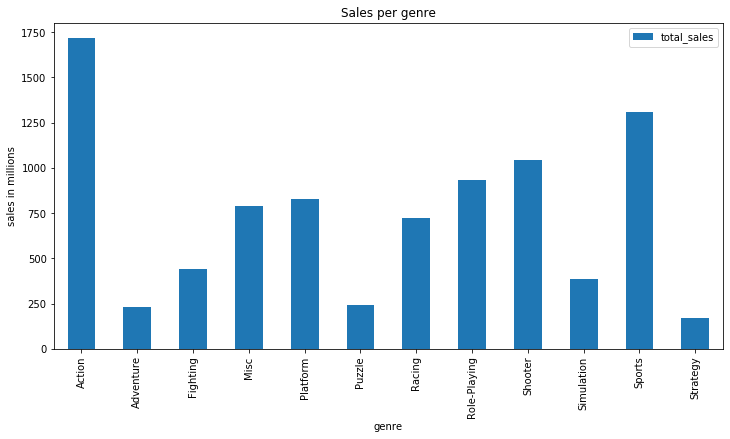

In [142]:
# graph sales info for genres
sales_per_genre.plot(kind='bar', figsize=(12, 6))
plt.title('Sales per genre')
plt.xlabel('genre')
plt.ylabel('sales in millions')
plt.show()

In [143]:
# examine the top 7 genres
top_seven_genres_list = ['Action', 'Sports', 'Shooter', 'Misc', 'Role-Playing', 'Racing', 'Platform']
top_seven_genres = games.query('genre == @top_seven_genres_list & year_of_release > 2005')
genre_data = top_seven_genres.pivot_table(index='year_of_release', columns='genre', values='total_sales')
genre_data.head()

genre,Action,Misc,Platform,Racing,Role-Playing,Shooter,Sports
year_of_release,,,,,,,
2006,0.359022,0.620093,0.912778,0.450800,0.521545,0.554203,0.983913
2007,0.499286,0.605695,0.835000,0.461667,0.421942,0.830706,0.588735
2008,0.610679,0.405943,0.566613,0.864691,0.526607,0.712771,0.475276
2009,0.506213,0.368010,1.397586,0.401071,0.459320,0.769889,0.750656
2010,0.510133,0.473333,1.001290,0.602982,0.676214,0.948519,0.490538


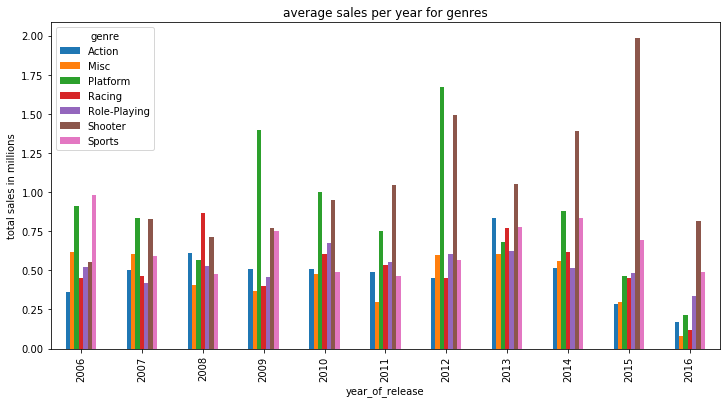

In [144]:
# graph the sales for top genres over the last decade
gen_ax = genre_data.plot(xticks=top_six_data.index, kind='bar', figsize=(12, 6))
gen_ylab = gen_ax.set_ylabel('total sales in millions')
plt.title('average sales per year for genres')
plt.show()

***Determine which platforms had releases in 2016***

In [145]:
# obtain releases from 2016 only
releases_in_2016 = games.query('year_of_release == "2016"')
releases_in_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
244,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
288,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07


In [146]:
# check the number of games released for platforms in 2016
print('number of games released per platform in 2016')
releases_in_2016['platform'].value_counts()

number of games released per platform in 2016


PS4     164
XOne     87
PSV      85
PC       54
3DS      46
PS3      38
WiiU     14
X360     13
Wii       1
Name: platform, dtype: int64

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Thank you for additional research :) Well done!
</div>

## Overall Conclusion

***Tasks Performed***
- Identify patterns that determine whether a game succeeds or not. 
    - This will allow you to spot potential big winners and plan advertising campaigns.
- Plan a campaign for 2017
    - (The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)


***Actions Performed***
1. Imported Libraries
2. Studied the general information
3. Preprocessed the data
    - Created working version of the dataframe
    - 3.a. Cleaned up the data
        - Replaced the column names (make them lowercase).
        - Converted the data to the required types.
        - Processed missing values where appropriate
        - If necessary, decide how to deal with missing values:
    - 3.b. Calculated the total sales (the sum of sales in all regions) for each game
4. Analyzed the data by answering the analysis questions
5. Created a user profile for each region
    - For each region (NA, EU, JP), determine:
        - Found the top 5 platforms and described thier market shares
        - Found the top 5 genres and described their market shares
        - Evaluate the affect of ESRB ratings in different regions
6. Answered hypothesis questions
    - Average user ratings of the Xbox One and PC platforms are the same.
    - Average user ratings for the Action and Sports genres are different.
7. Wrote general conclusion


***Conclusions and Recommendations***

***Patterns***
- In the past decade: 
    - the following platforms had the greatest sales:
        - PS, DS, Wii, PS3, X360, PS2
        - NA & EU had different platforms perform well
        - JP had a majority of playstation and nintedo platforms perform well
        - However, the top platforms appear to be approaching the end of their lifespan in 2016, so while their sales have been high, they may start to decline
    - the following genres had the greatest sales (NA, EU & JP regions):
        - Action, Sports, Shooters, Misc, Role Playing, Racing, Platform
        - NA & EU regions shared 4 out of 5 in their top 5
        - NA, EU, and JP shared 3 out of 5 in their top 5
        - There doesnt appear to be a life span for genres, however there does appear to have peaks, this could be due to specific game releases and popularity
    - there may be a correlation between platform and genre performance because certain platforms may be known and popular for specific genres

***2017 campaign***
- I recommend to focus on:
    - the top 5 genres per region from the last decade
        - I do not predict that these will change much
    - the next generation of platforms of the top 6 performers from the last decade
        - while their sales may be low now, it is likely because they are at the beginning of their life span and havent peaked yet
        - in 2016 the games released for PS4 > PS3, WiiU > Wii, and XOne > X360
    - there may also be an increase in handheld devices such as the PSV and 3DS
    
<font color='red'><b><u> V.2. updates </u></b></font>

6. Answered hypothesis questions
    - Average user ratings of the Xbox One and PC platforms are statistically the same. XOne: 6.60 vs PC: 6.31 
    - Average user ratings for the Action and Sports genres are different. Action: 6.75 vs Sports: 5.29


***Patterns***
- From 2014 - 2016: 
- Platforms: 
    - the following platforms had the greatest sales:
        - PS4, XOne, 3DS, PS3, X360
    - the least sales were for:
        - WiiU, PC, PSV, Wii, PSP
    - NA, EU, and JP share the same top 3 sales: PS4, 3DS, PS3: playstation and nintendo
    - NA & EU had different platforms perform well
        - NA and EU have the same top 4 sales: PS4, XOne, 3DS, PS3
            - X360 and PC are in NA and EU top 5, respectively
            - these regions have top sales in a range of companies: playstation, xbox, pc, nintendo
    - JP sales top sales also include PSV and WiiU (including PS4, 3DS, PS3)
        - this region has top sales in 2 companies, playstatoin and nintendo
- Genres:
    - Based on average sales, Shooter genre makes the most, with Sports genre in second (about 1/2 of Shooter), all others are under 0.6 million
    - the following genres had the greatest sales (NA, EU & JP regions):
        - Action and Role Playing genres have the most sales
        - NA, EU have the same top 4 genres: Action, Shooter, Sports, Role Playing
            - shooter and sports do not do well in JP
        - JP has 2 top selling genres: action and role playing
    - There doesnt appear to be a life span for genres, however there does appear to have peaks, this could be due to specific game releases and popularity
    - there may be a correlation between platform and genre performance because certain platforms may be known and popular for specific genres

***2017 campaign***
- I recommend to focus on:
    - Focus on the top popular genres and next generation platforms (which havent reached their peak sales or lifespan) for each region:
        - NA & EU: 
            - genres: action, shooter, sports, role playing
            - platforms: PS4, XOne, 3DS
        - JP: 
            - genres: action and role playing
            - platforms: PS4 and 3DS 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
You have made an excellent conclusion :) All main trends in the people preferences were clearly described.
</div>